# **CS 513: KNOWLEDGE DISCOVERY AND DATA MINING**
##**GROUP 17:**

**MEMBERS:**
* AMRUTHA KANAKATTE RAVISHANKAR; CWID: 20027346
* OJAS yOGENDRA VAZE; CWID: 20034747
* HARSHKUMAR DIPESHKUMAR BHIKADIYA; CWID: 20033108
* BHUMITI VIPULBHAI GOHEL; CWID: 20025320

In [267]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
import random
import hashlib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from tensorflow.keras.utils import plot_model  # Import to draw the model
from IPython.display import display, Image  # For displaying images directly in notebooks

##DATA PREPARATION

In [268]:
# Load the dataset
data = pd.read_csv('phishing.csv')
data.shape

(11054, 32)

In [269]:
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [270]:
# Convert columns to categorical if they are discrete
categorical_columns = ['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
                       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
                       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
                       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
                       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
                       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
                       'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
                       'LinksPointingToPage', 'StatsReport', 'class']

data[categorical_columns] = data[categorical_columns].astype('category')

In [271]:
#Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Index                11054 non-null  int64   
 1   UsingIP              11054 non-null  category
 2   LongURL              11054 non-null  category
 3   ShortURL             11054 non-null  category
 4   Symbol@              11054 non-null  category
 5   Redirecting//        11054 non-null  category
 6   PrefixSuffix-        11054 non-null  category
 7   SubDomains           11054 non-null  category
 8   HTTPS                11054 non-null  category
 9   DomainRegLen         11054 non-null  category
 10  Favicon              11054 non-null  category
 11  NonStdPort           11054 non-null  category
 12  HTTPSDomainURL       11054 non-null  category
 13  RequestURL           11054 non-null  category
 14  AnchorURL            11054 non-null  category
 15  Links

In [272]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe(include='all'))


Summary Statistics:
               Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  \
count   11054.000000  11054.0  11054.0   11054.0  11054.0        11054.0   
unique           NaN      2.0      3.0       2.0      2.0            2.0   
top              NaN      1.0     -1.0       1.0      1.0            1.0   
freq             NaN   7262.0   8960.0    9610.0   9399.0         9626.0   
mean     5526.500000      NaN      NaN       NaN      NaN            NaN   
std      3191.159272      NaN      NaN       NaN      NaN            NaN   
min         0.000000      NaN      NaN       NaN      NaN            NaN   
25%      2763.250000      NaN      NaN       NaN      NaN            NaN   
50%      5526.500000      NaN      NaN       NaN      NaN            NaN   
75%      8289.750000      NaN      NaN       NaN      NaN            NaN   
max     11053.000000      NaN      NaN       NaN      NaN            NaN   

        PrefixSuffix-  SubDomains    HTTPS  DomainRegLen  ...  \
c

In [273]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64


In [274]:
print(data['class'].unique())

[-1, 1]
Categories (2, int64): [-1, 1]


In [275]:
data['class'].value_counts()

,count
class,
1,6157
-1,4897


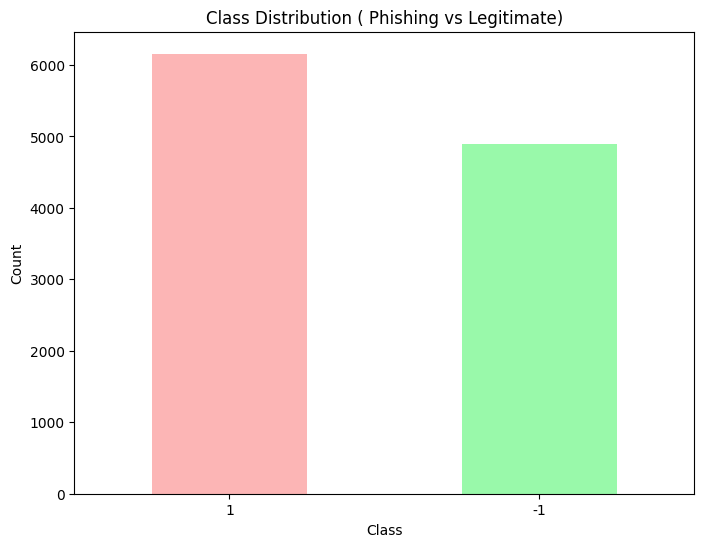

In [276]:
# Visualize target class distribution
plt.figure(figsize=(8, 6))
data['class'].value_counts().plot(kind='bar', color=['#FCB5B5','#99F9AA'])
plt.title("Class Distribution ( Phishing vs Legitimate)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

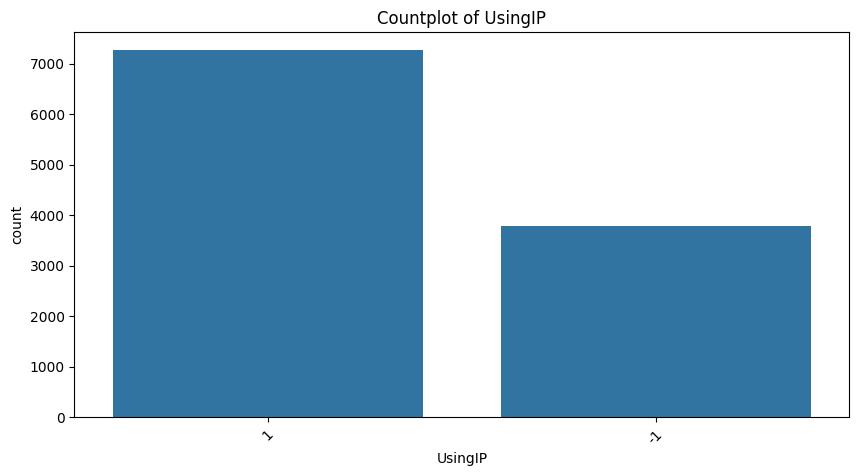

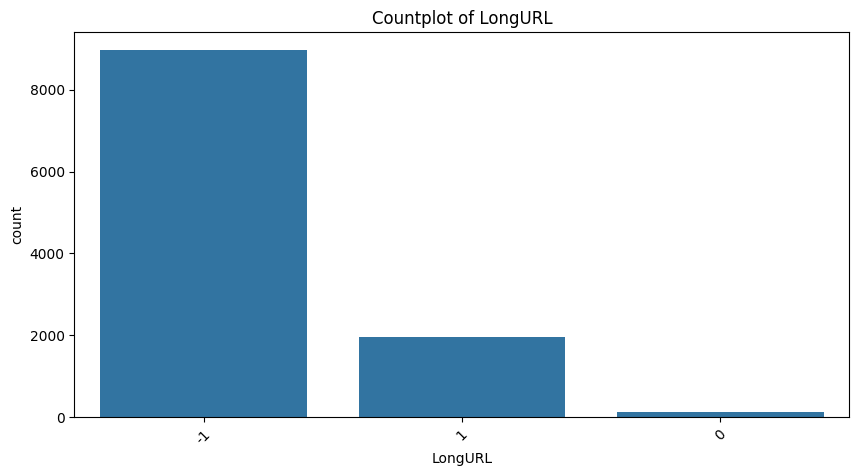

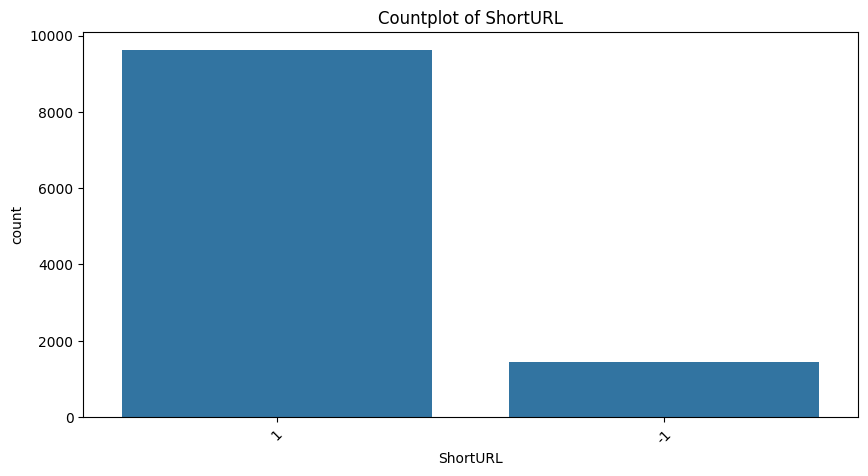

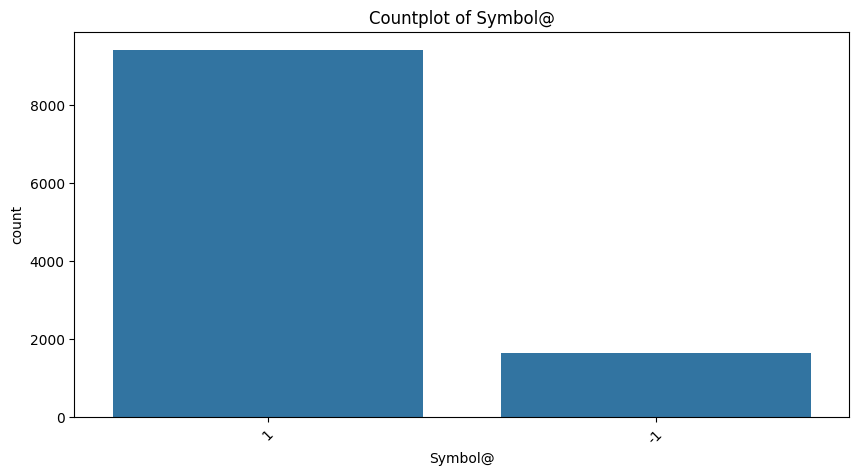

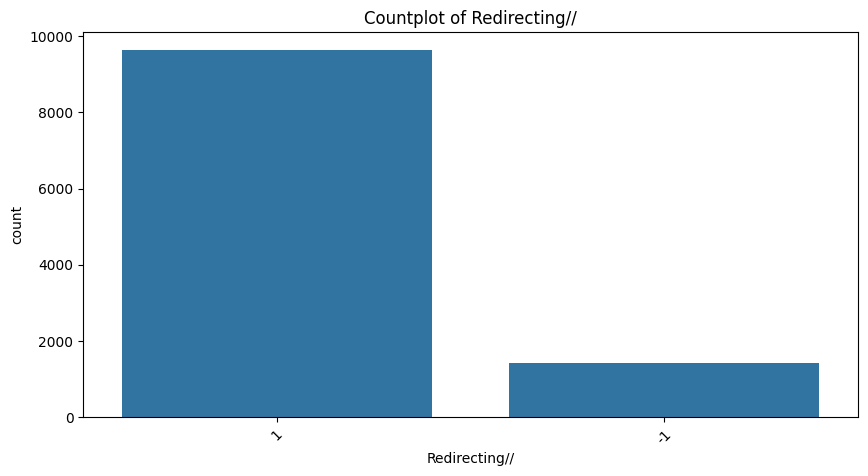

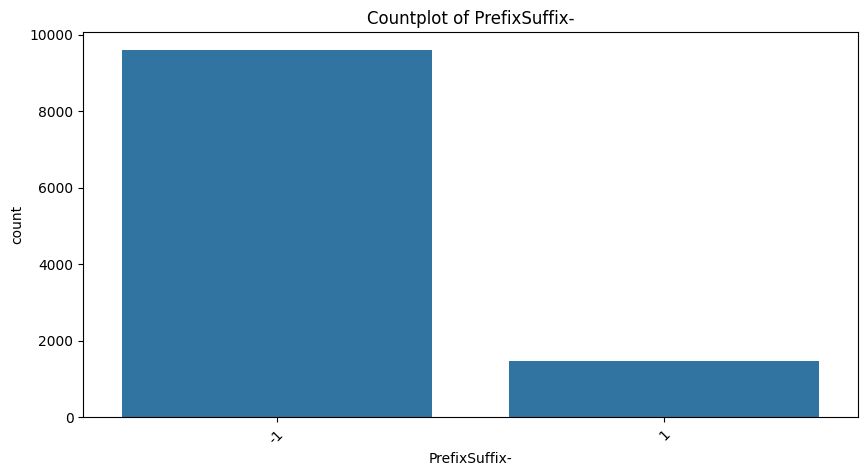

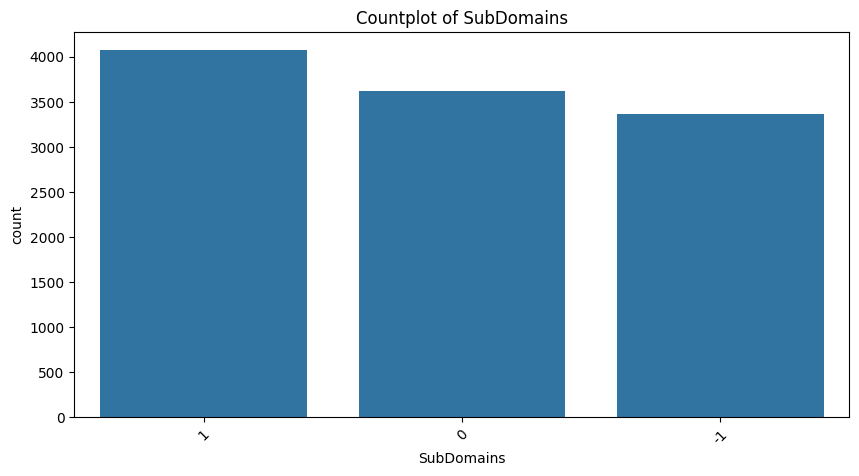

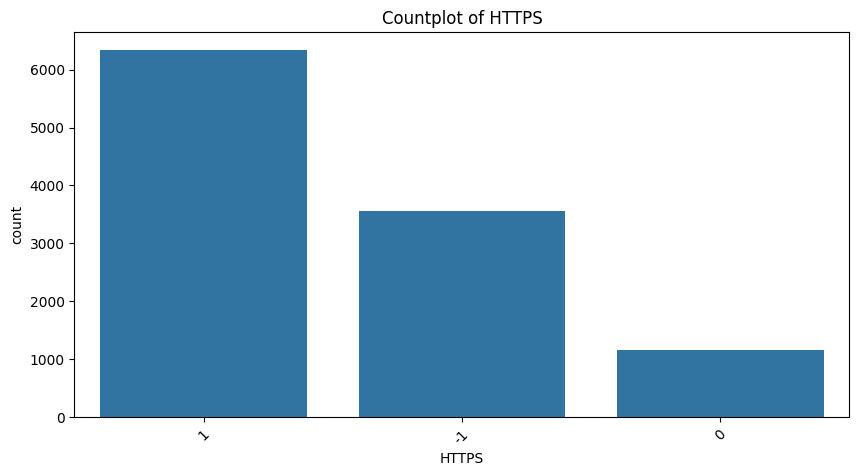

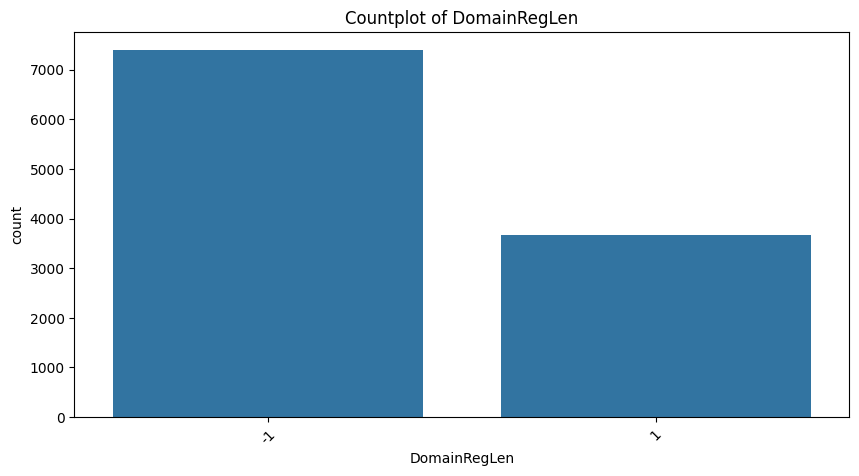

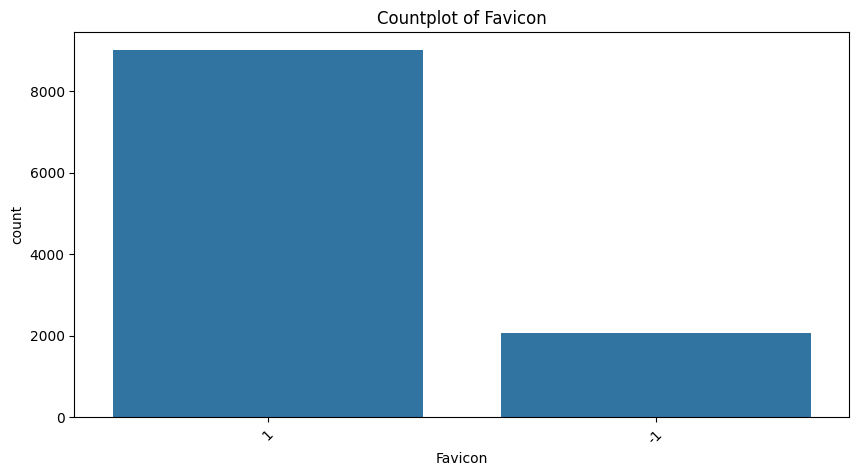

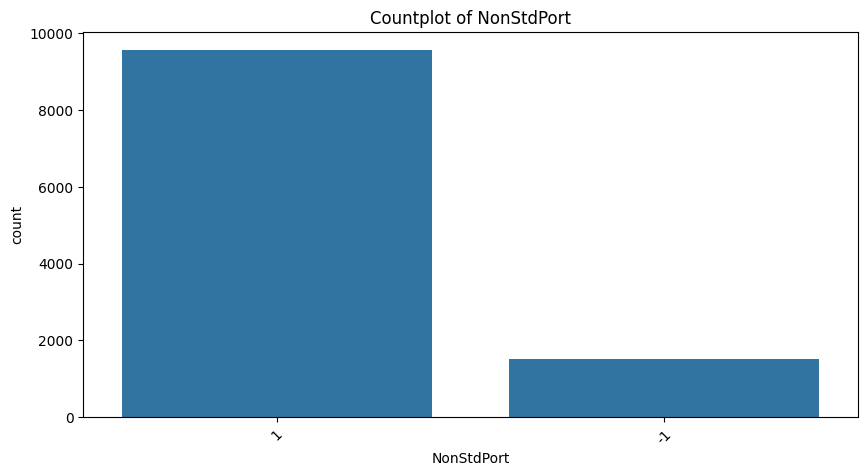

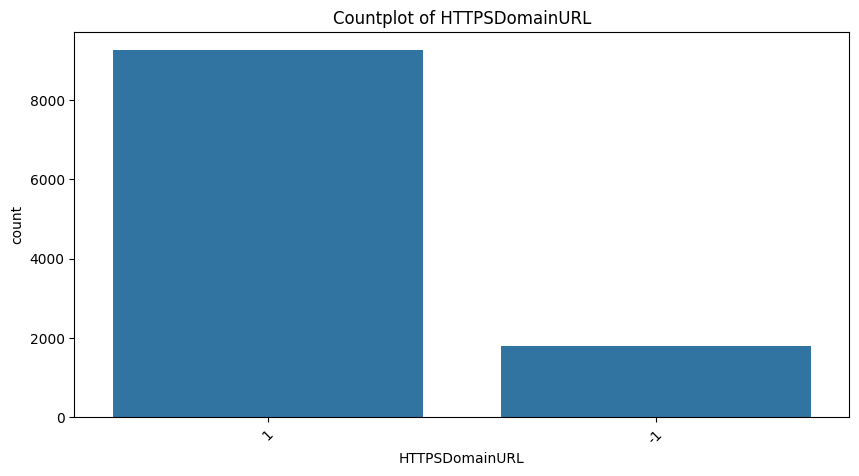

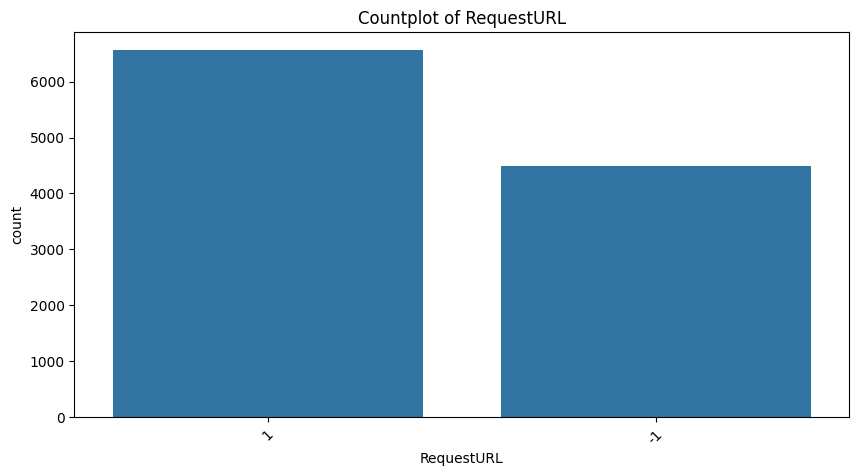

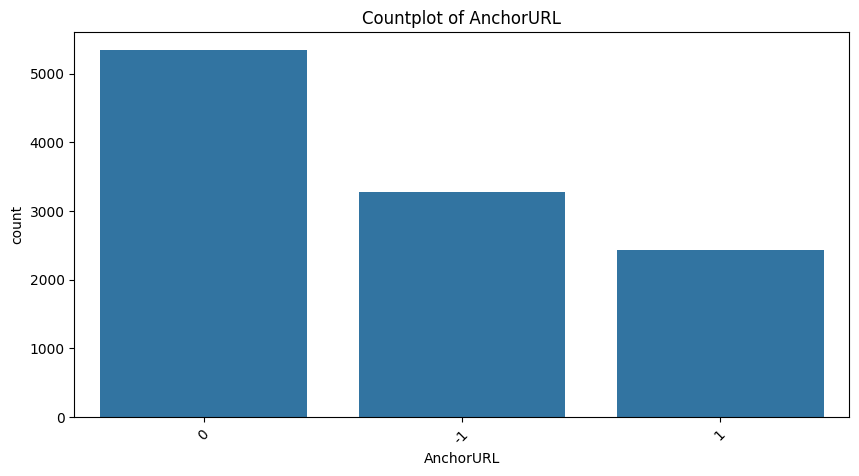

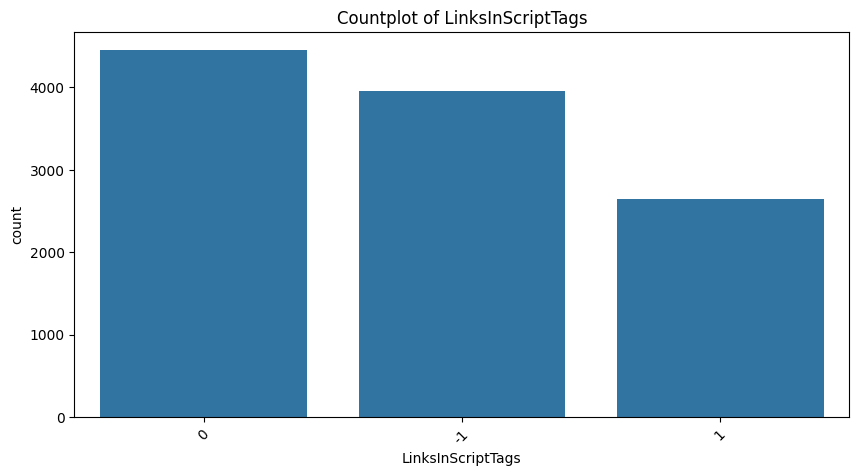

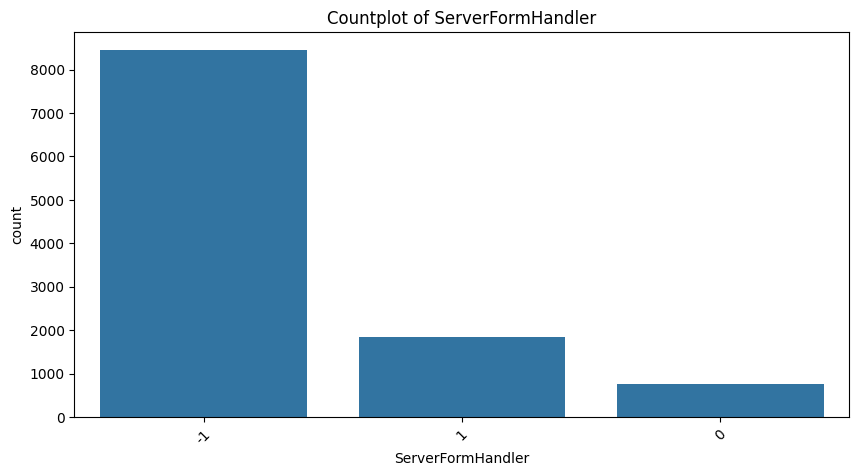

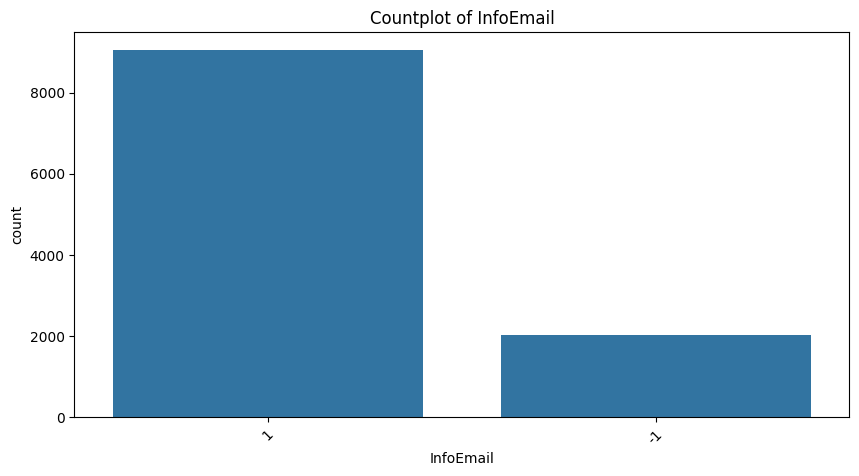

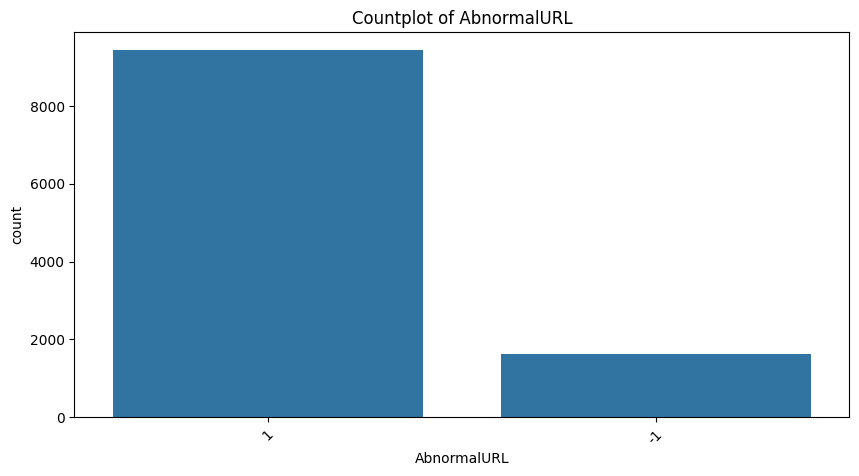

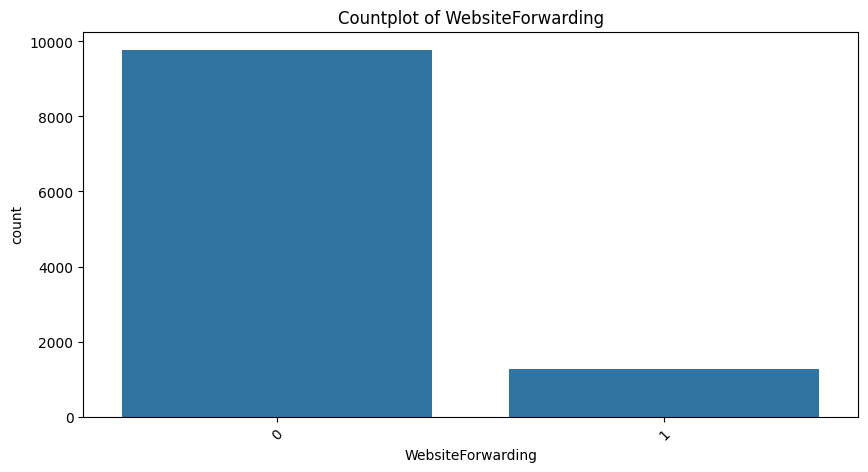

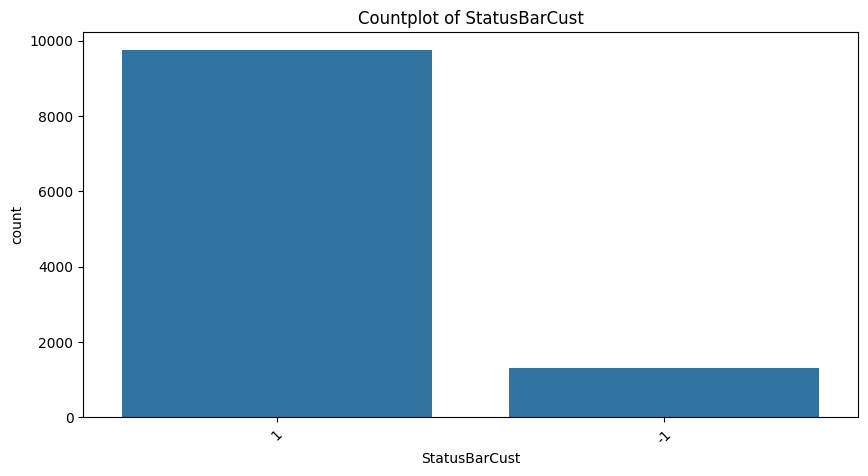

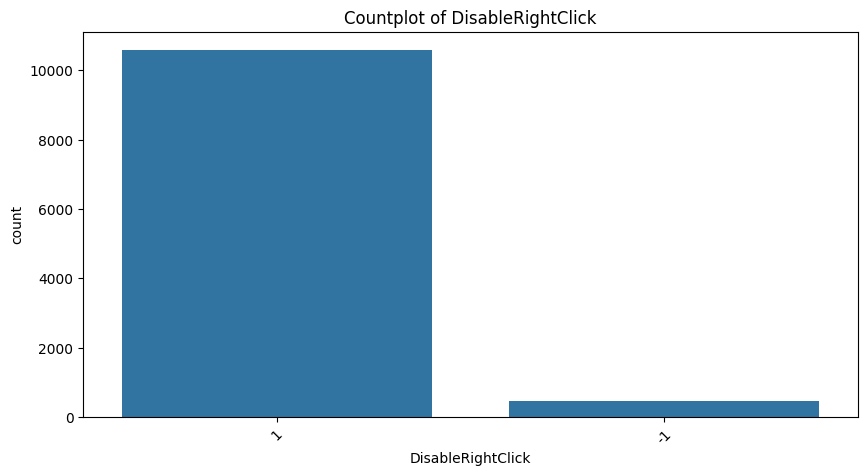

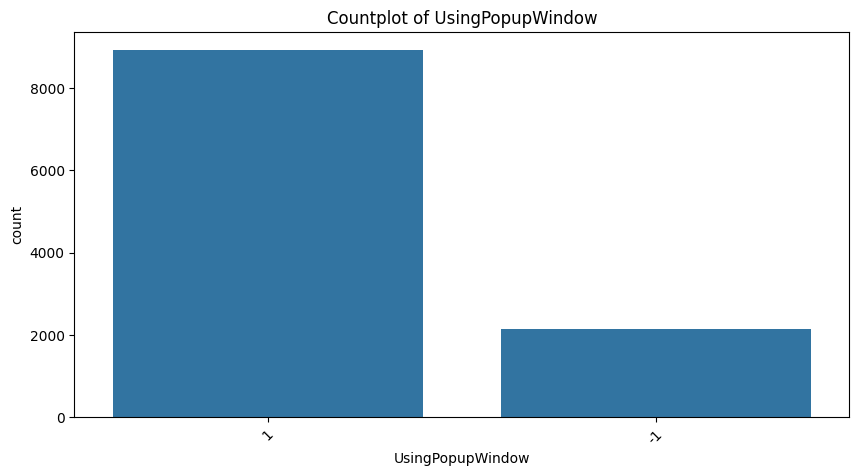

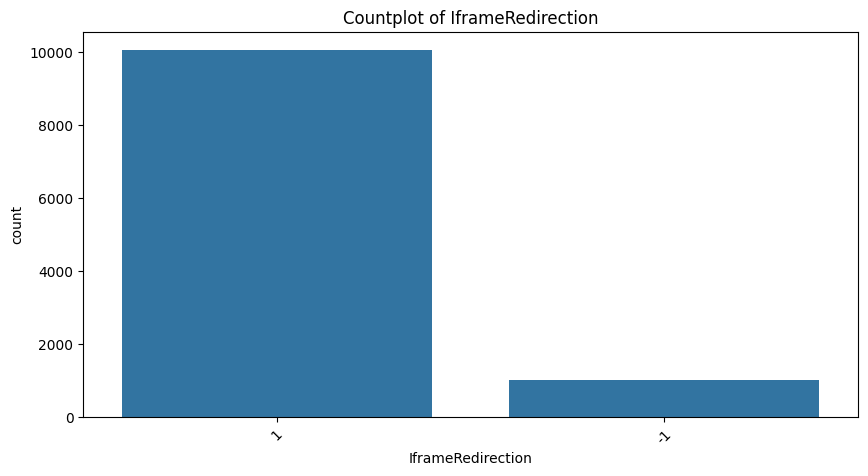

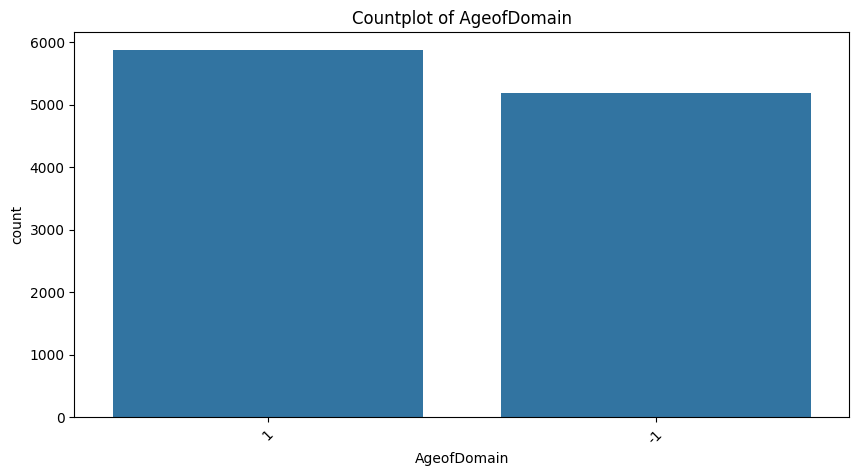

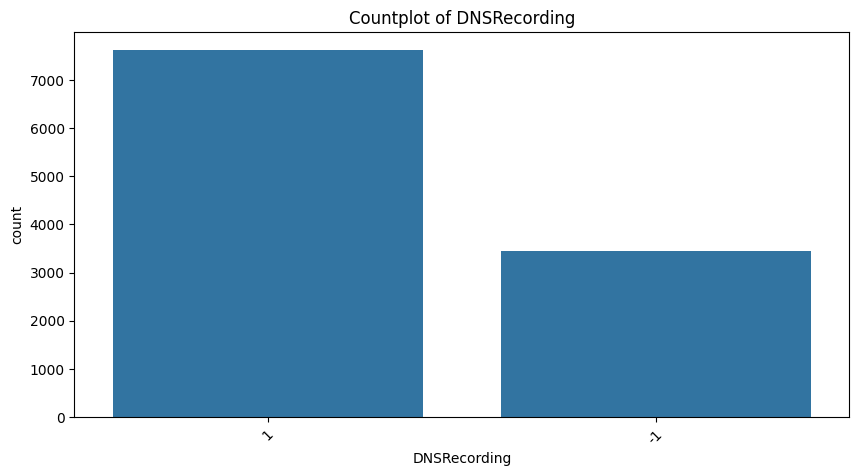

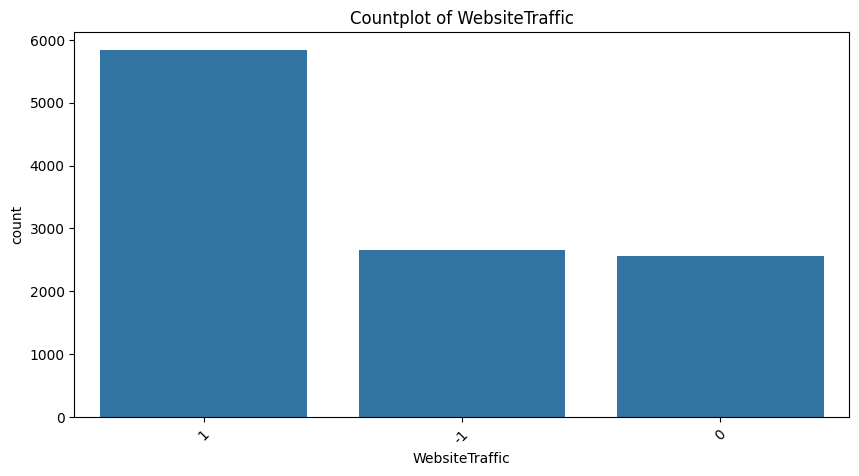

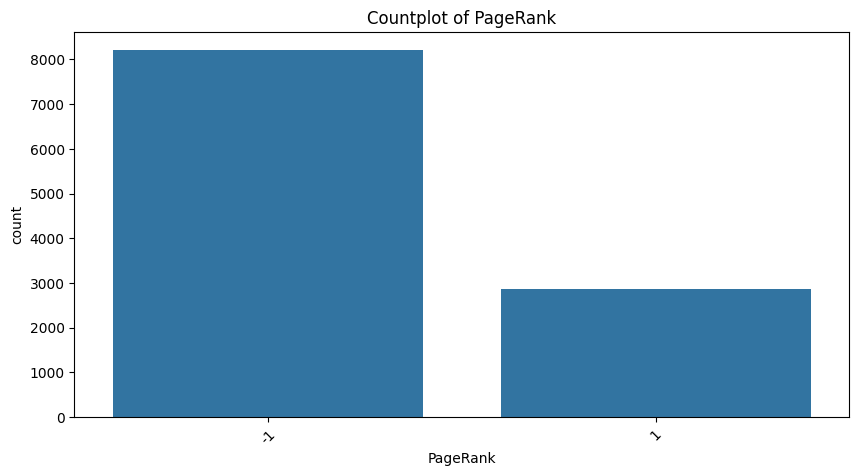

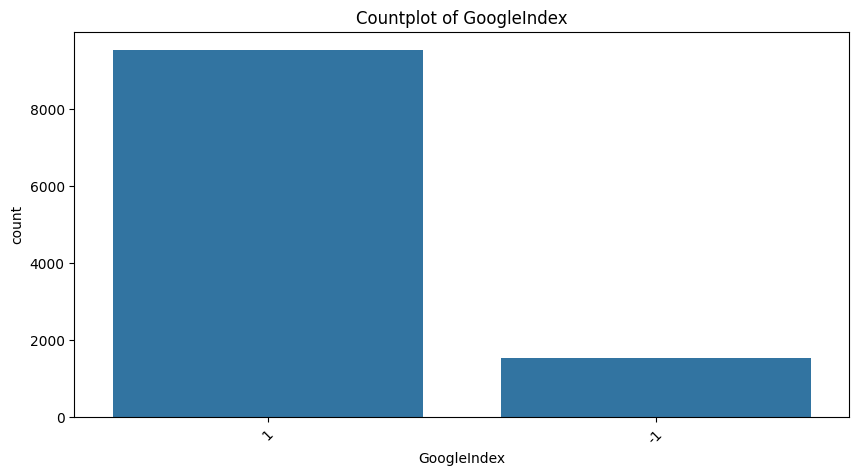

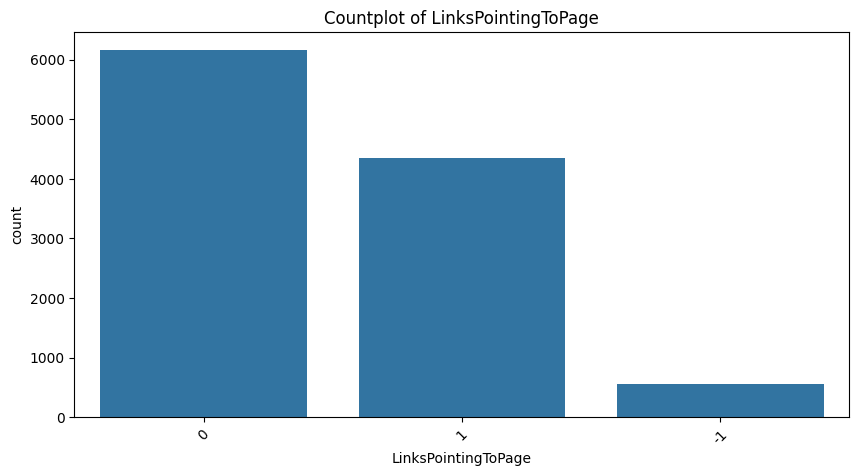

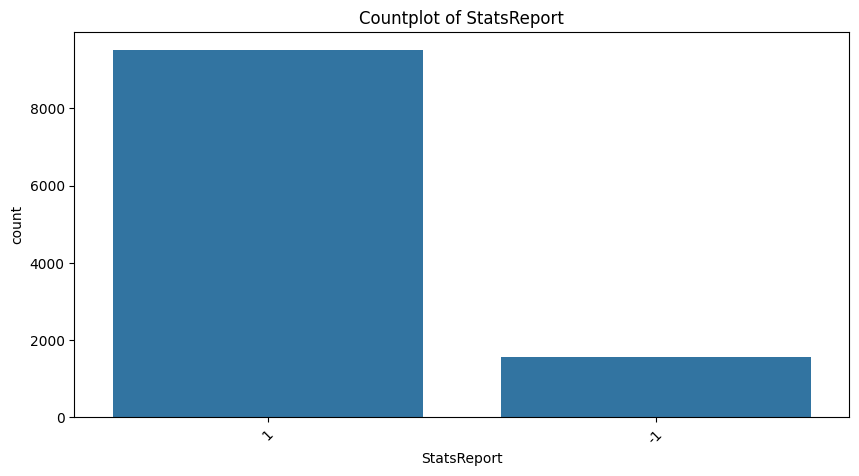

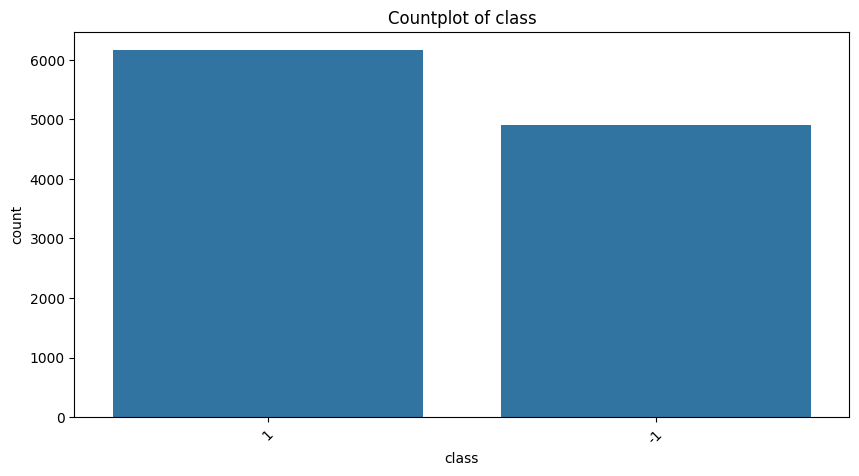

In [277]:
# Distribution of categorical features
for feature in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=data, order=data[feature].value_counts().index)
    plt.title(f"Countplot of {feature}")
    plt.xticks(rotation=45)
    plt.show()
    print('\n')

## FEATURE SELECTION

In [278]:
X = data[categorical_columns[:-1]]  # Features
y = data['class']  # Target variable

#One-hot Encoding
X = pd.get_dummies(X, drop_first=True)

# RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature importances
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                  Feature  Importance
10                HTTPS_1    0.337498
17            AnchorURL_1    0.091812
16            AnchorURL_0    0.070335
32       WebsiteTraffic_1    0.065916
8            SubDomains_1    0.056350
6         PrefixSuffix-_1    0.041780
9                 HTTPS_0    0.037068
31       WebsiteTraffic_0    0.025609
7            SubDomains_0    0.022331
15           RequestURL_1    0.021986
18    LinksInScriptTags_0    0.018916
29          AgeofDomain_1    0.017775
19    LinksInScriptTags_1    0.015858
0               UsingIP_1    0.015611
11         DomainRegLen_1    0.014931
21    ServerFormHandler_1    0.013685
34          GoogleIndex_1    0.013330
30         DNSRecording_1    0.012635
33             PageRank_1    0.012234
36  LinksPointingToPage_1    0.010013
35  LinksPointingToPage_0    0.009707
2               LongURL_1    0.009380
14       HTTPSDomainURL_1    0.006021
20    ServerFormHandler_0    0.005575
4               Symbol@_1    0.005553
24    Websit

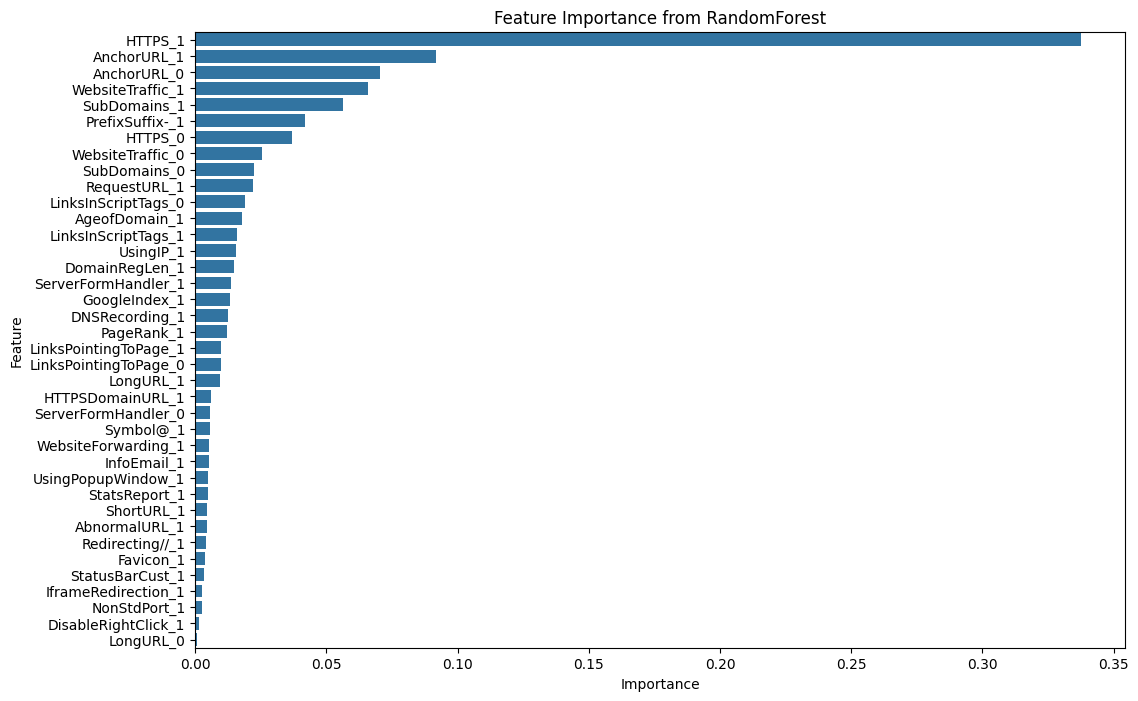

In [279]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from RandomForest')
plt.show()

In [280]:
print('Shape after One-Hot Encoding',X.shape)
X.columns

Shape after One-Hot Encoding (11054, 38)


Index(['UsingIP_1', 'LongURL_0', 'LongURL_1', 'ShortURL_1', 'Symbol@_1',
       'Redirecting//_1', 'PrefixSuffix-_1', 'SubDomains_0', 'SubDomains_1',
       'HTTPS_0', 'HTTPS_1', 'DomainRegLen_1', 'Favicon_1', 'NonStdPort_1',
       'HTTPSDomainURL_1', 'RequestURL_1', 'AnchorURL_0', 'AnchorURL_1',
       'LinksInScriptTags_0', 'LinksInScriptTags_1', 'ServerFormHandler_0',
       'ServerFormHandler_1', 'InfoEmail_1', 'AbnormalURL_1',
       'WebsiteForwarding_1', 'StatusBarCust_1', 'DisableRightClick_1',
       'UsingPopupWindow_1', 'IframeRedirection_1', 'AgeofDomain_1',
       'DNSRecording_1', 'WebsiteTraffic_0', 'WebsiteTraffic_1', 'PageRank_1',
       'GoogleIndex_1', 'LinksPointingToPage_0', 'LinksPointingToPage_1',
       'StatsReport_1'],
      dtype='object')

In [281]:
top_n = 10

# Select the top N important features
top_features = importance_df.head(top_n)['Feature'].tolist()

X_top = X[top_features]

print("Top N Important Features:")
print(top_features)
print("\nShape of the new feature set:", X_top.shape)

Top N Important Features:
['HTTPS_1', 'AnchorURL_1', 'AnchorURL_0', 'WebsiteTraffic_1', 'SubDomains_1', 'PrefixSuffix-_1', 'HTTPS_0', 'WebsiteTraffic_0', 'SubDomains_0', 'RequestURL_1']

Shape of the new feature set: (11054, 10)


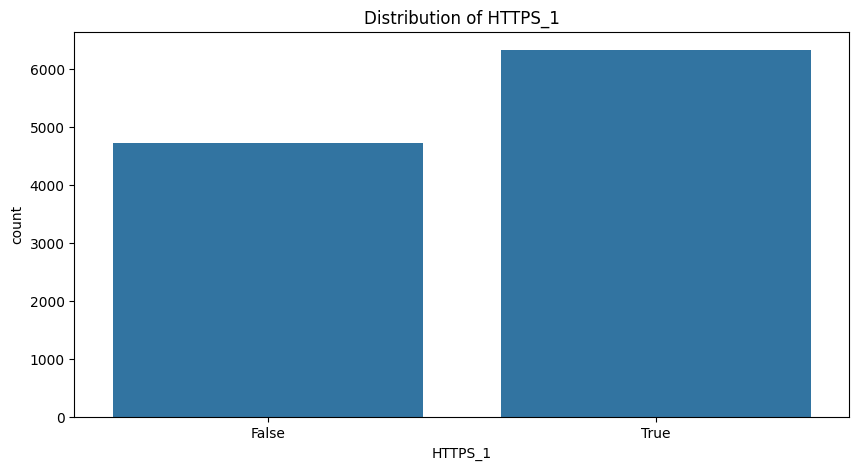

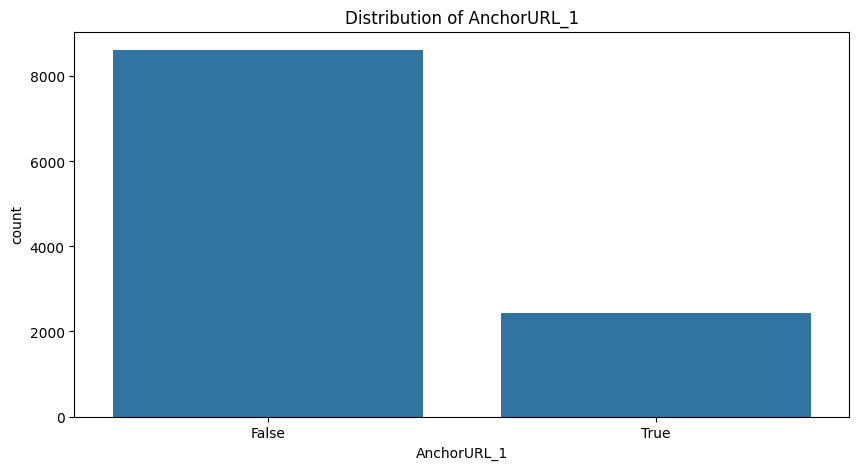

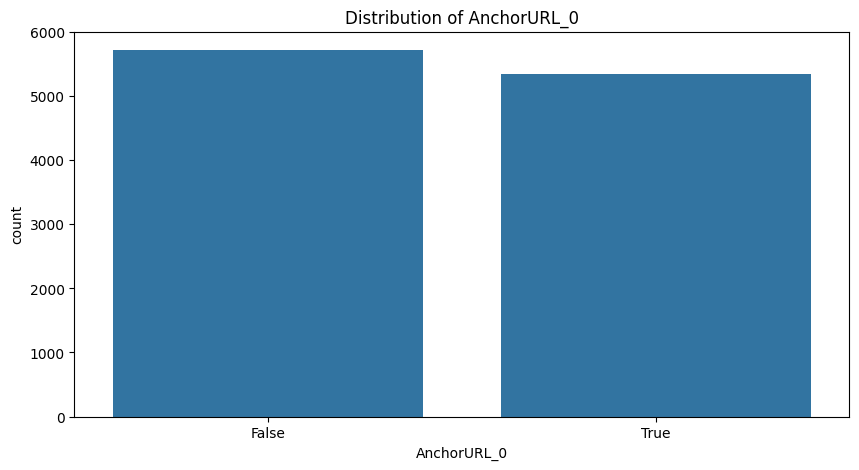

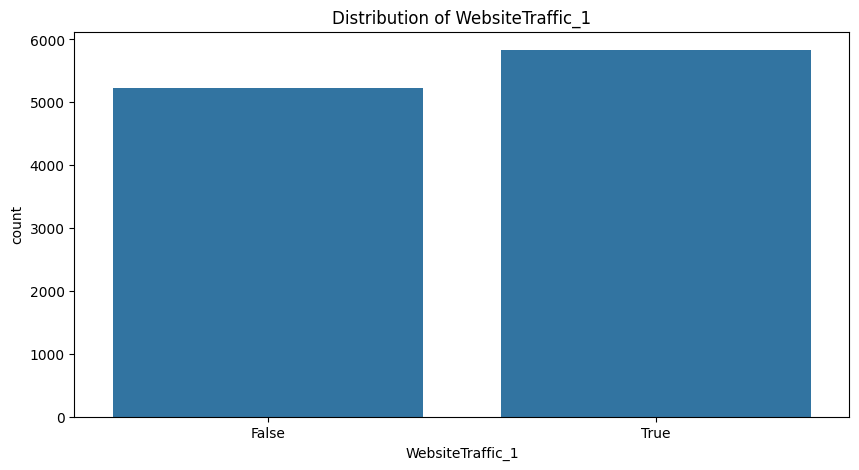

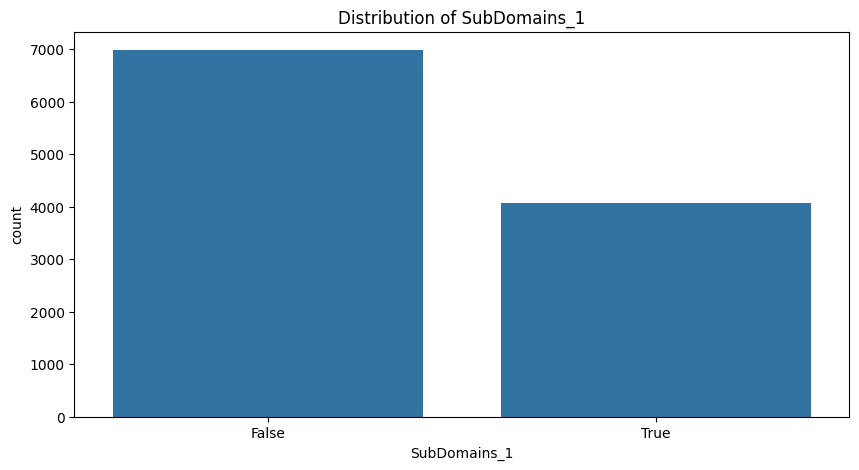

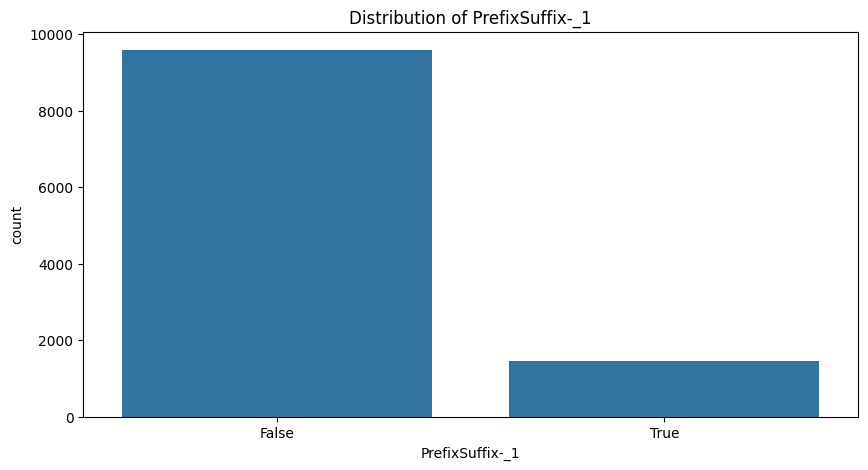

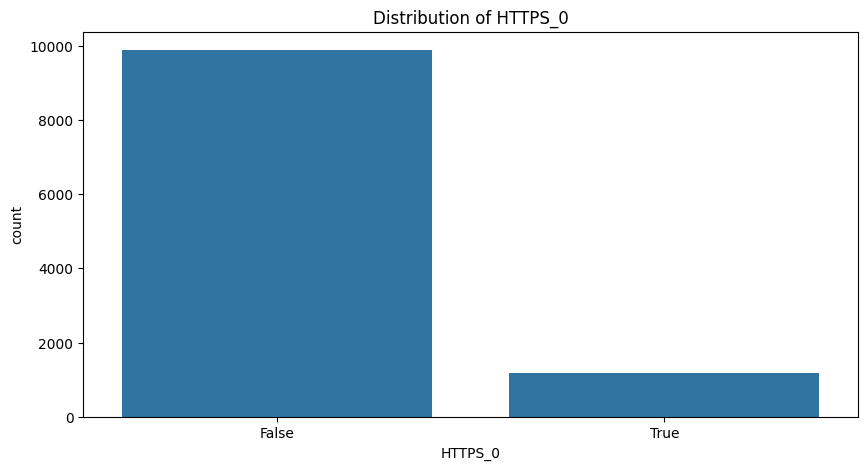

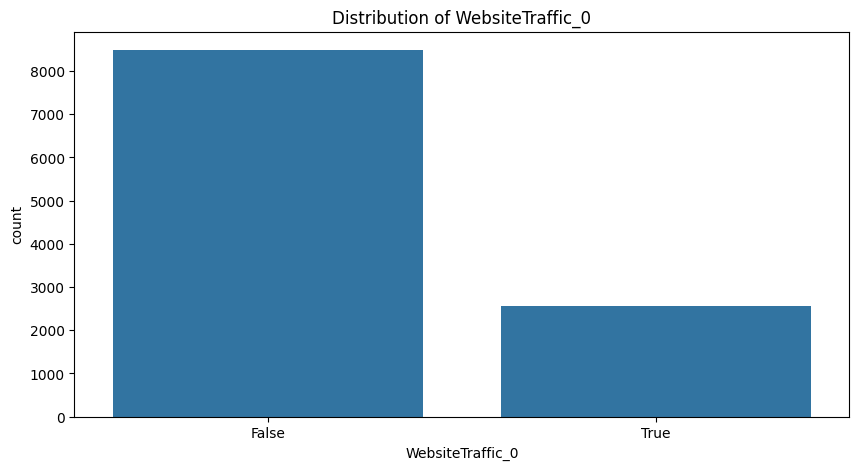

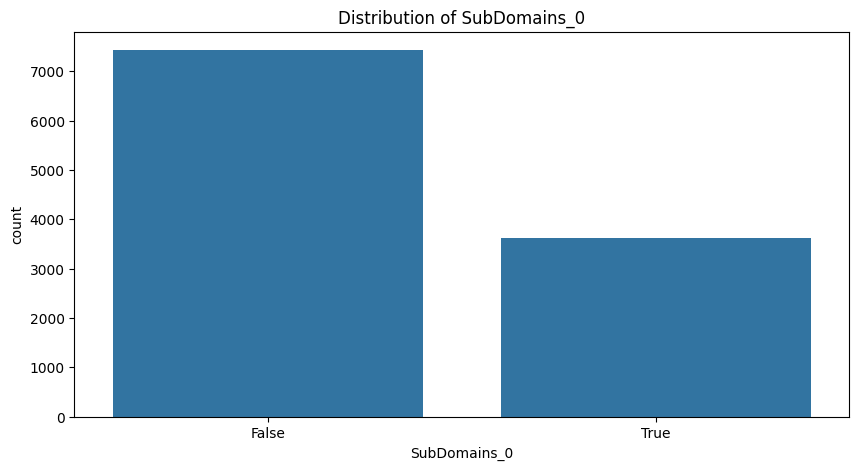

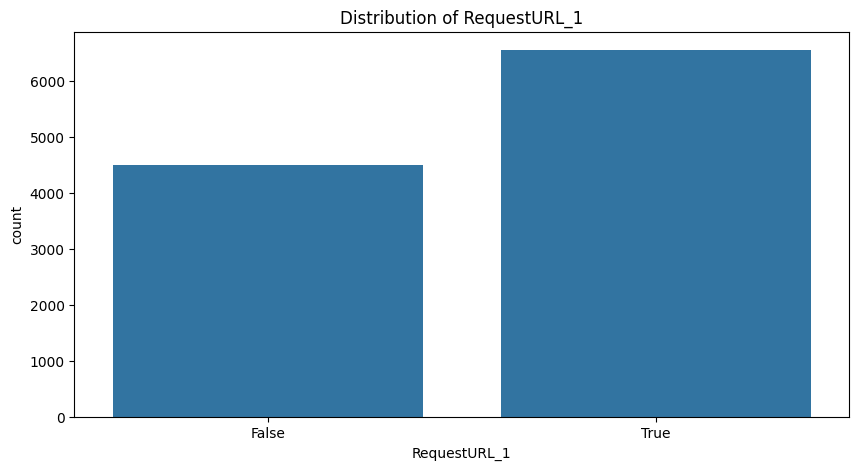

In [282]:
selected_features = ['HTTPS_1', 'AnchorURL_1', 'AnchorURL_0', 'WebsiteTraffic_1',
                     'SubDomains_1', 'PrefixSuffix-_1', 'HTTPS_0', 'WebsiteTraffic_0',
                     'SubDomains_0', 'RequestURL_1']

# Plot the distribution of each feature
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=X[selected_features])
    plt.title(f"Distribution of {feature}")
    plt.show()

In [283]:
# Convert boolean columns to integers (0 or 1)
X = X.astype(int)
print("\nData types after conversion to int:")
print(X.dtypes)


Data types after conversion to int:
UsingIP_1                int64
LongURL_0                int64
LongURL_1                int64
ShortURL_1               int64
Symbol@_1                int64
Redirecting//_1          int64
PrefixSuffix-_1          int64
SubDomains_0             int64
SubDomains_1             int64
HTTPS_0                  int64
HTTPS_1                  int64
DomainRegLen_1           int64
Favicon_1                int64
NonStdPort_1             int64
HTTPSDomainURL_1         int64
RequestURL_1             int64
AnchorURL_0              int64
AnchorURL_1              int64
LinksInScriptTags_0      int64
LinksInScriptTags_1      int64
ServerFormHandler_0      int64
ServerFormHandler_1      int64
InfoEmail_1              int64
AbnormalURL_1            int64
WebsiteForwarding_1      int64
StatusBarCust_1          int64
DisableRightClick_1      int64
UsingPopupWindow_1       int64
IframeRedirection_1      int64
AgeofDomain_1            int64
DNSRecording_1           int64
We

In [284]:
#Split data into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [285]:
# Apply SMOTE to the training data
print("Training set shape before SMOTE:", X_train.shape)
print("Testing set shape (unchanged):", X_test.shape)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Training set shape after SMOTE:", X_train_smote.shape)
print("Testing set shape (unchanged):", X_test.shape)

Training set shape before SMOTE: (7737, 38)
Testing set shape (unchanged): (3317, 38)
Training set shape after SMOTE: (8618, 38)
Testing set shape (unchanged): (3317, 38)


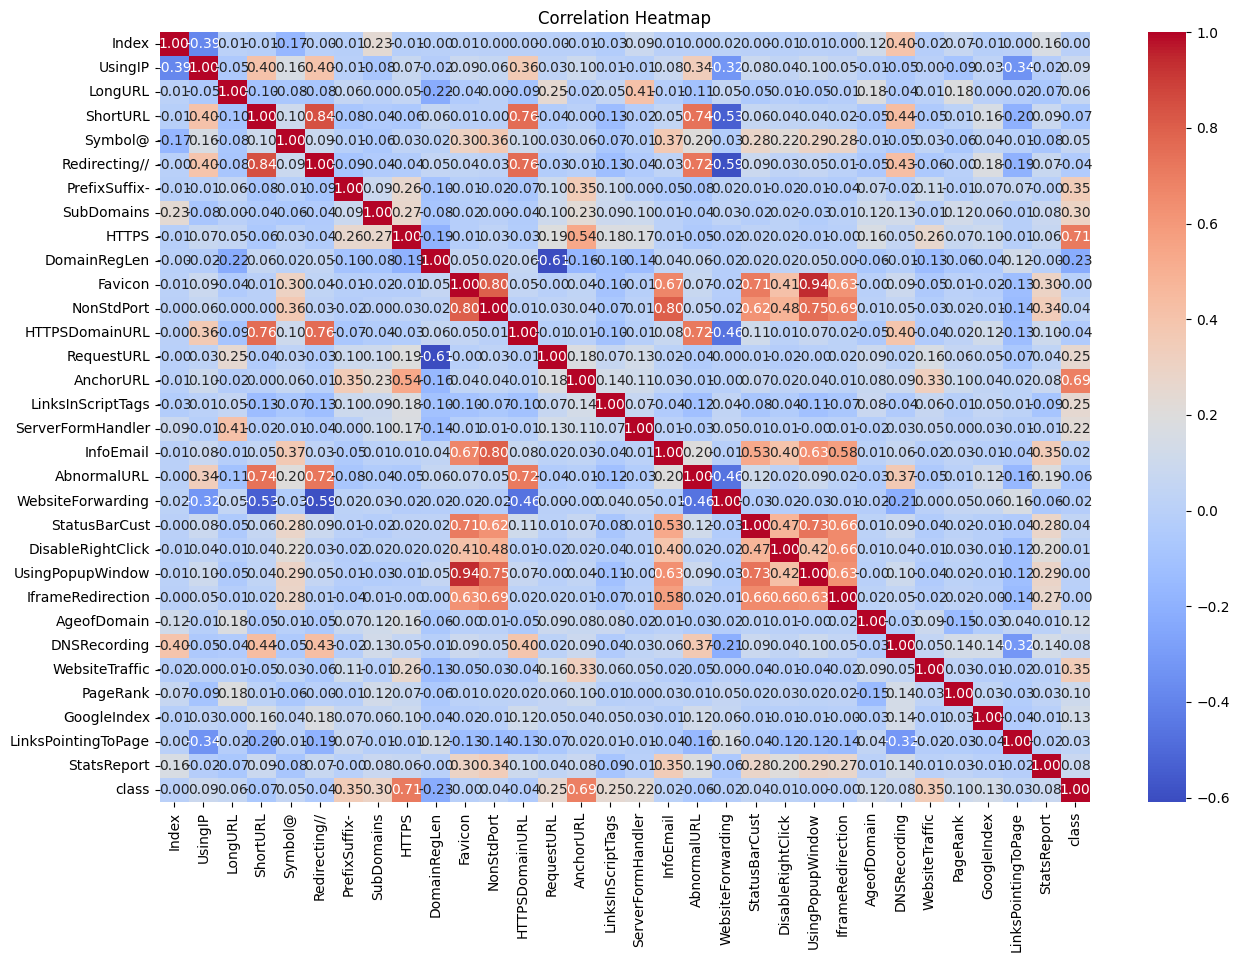

In [286]:
# Calculate correlation matrix
corr_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#MODELS

## 1. Naive bayes

In [287]:
# Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train_smote, y_train_smote)

GaussianNB()

In [288]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

Accuracy score
0.7766053662948448
Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.99      0.80      1469
           1       0.99      0.61      0.75      1848

    accuracy                           0.78      3317
   macro avg       0.83      0.80      0.77      3317
weighted avg       0.85      0.78      0.77      3317

Confusion Matrix:
[[1455   14]
 [ 727 1121]] 



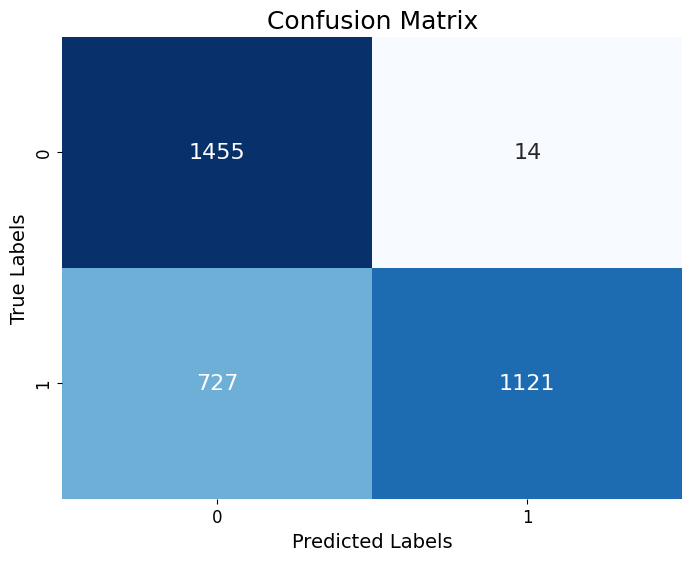

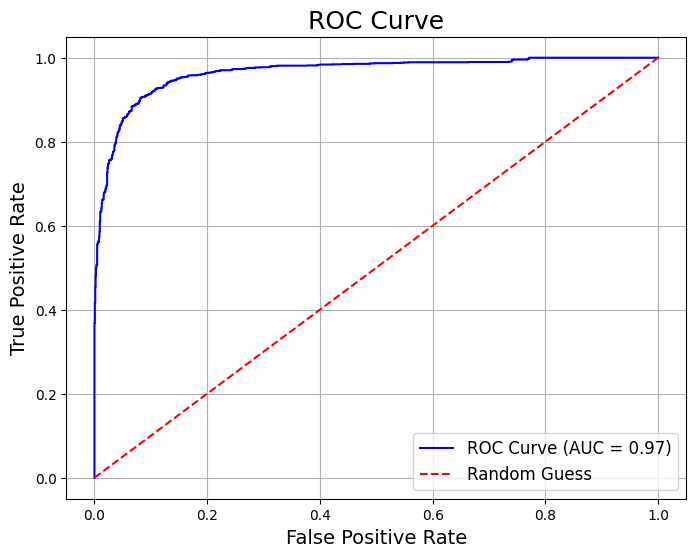

In [289]:
#Model Evaluation
# Accuracy score
print('Accuracy score')
print(accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix,'\n')

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('\n')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid()
plt.show()

## 2.Gradient Boosting Classifier

In [290]:
# Initialize and train the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(random_state=42)

In [291]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

Accuracy score
0.9556828459451311
Classification Report:
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95      1469
           1       0.96      0.96      0.96      1848

    accuracy                           0.96      3317
   macro avg       0.95      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317

Confusion Matrix:
[[1400   69]
 [  78 1770]]




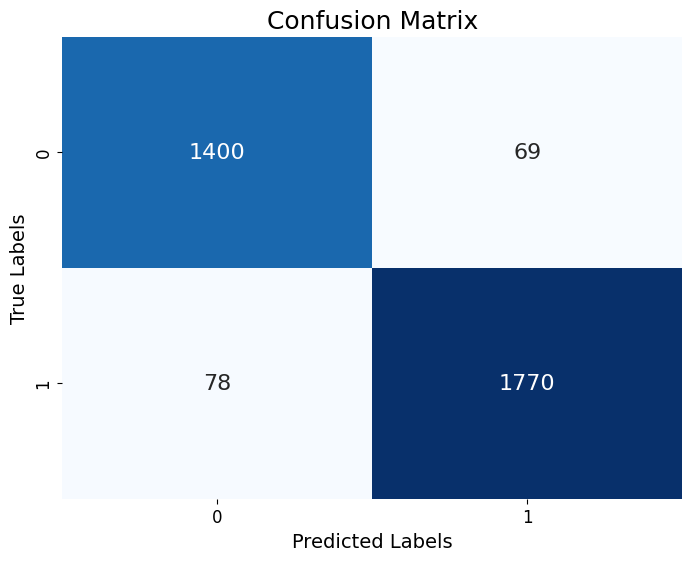

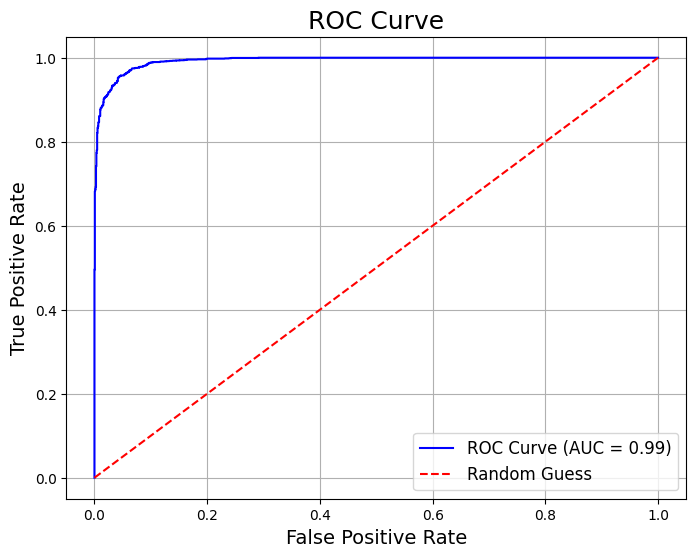

In [292]:
#Model Evaluation
# Accuracy score
print('Accuracy score')
print(accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('\n')

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid()
plt.show()


## 3. Logistic Regression

In [293]:
#Initilazing the model
model = LogisticRegression(random_state=42)
model.fit(X_train_smote, y_train_smote)

LogisticRegression(random_state=42)

In [294]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

Accuracy score
0.9469400060295448
Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1469
           1       0.95      0.95      0.95      1848

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317

Confusion Matrix:
[[1385   84]
 [  92 1756]]




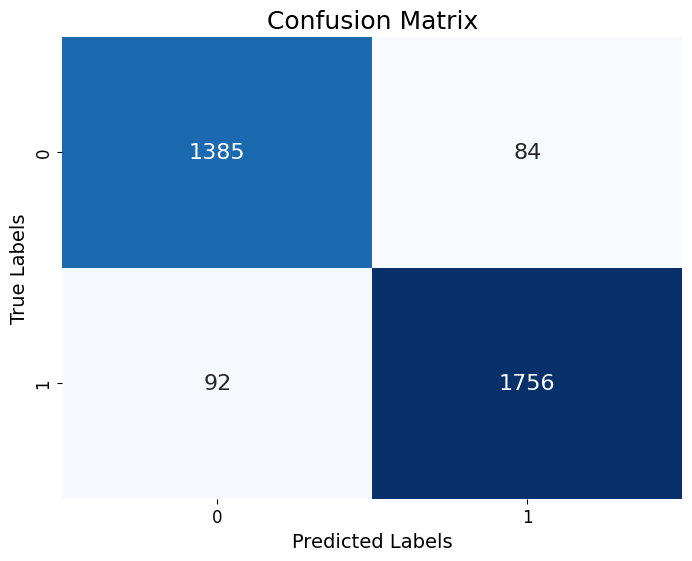

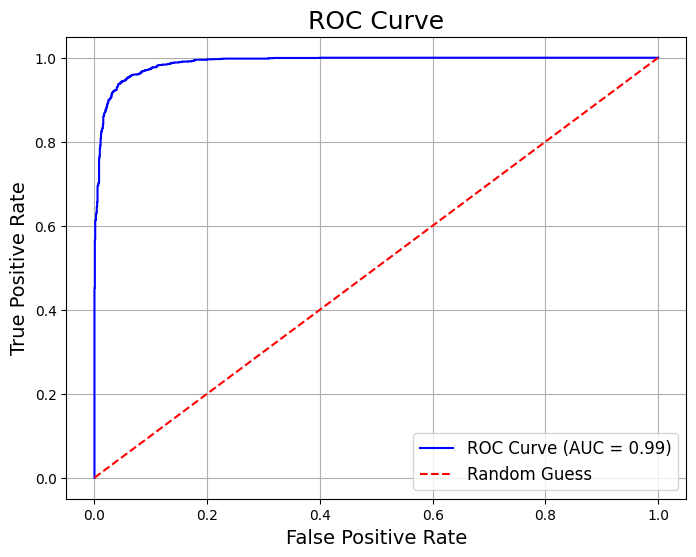

In [295]:
#Model Evaluation
# Accuracy score
print('Accuracy score')
print(accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('\n')

# Plot the Confusion Matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('\n')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid()
plt.show()

## 4. Random Forest Classifier

In [296]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [297]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

Accuracy score
0.9716611395839614
Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.97      0.97      1469
           1       0.97      0.98      0.97      1848

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317

Confusion Matrix:
[[1420   49]
 [  45 1803]]




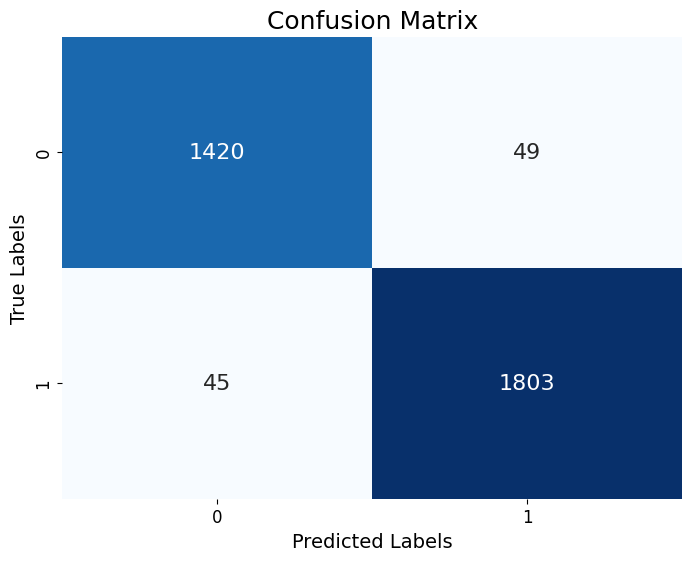

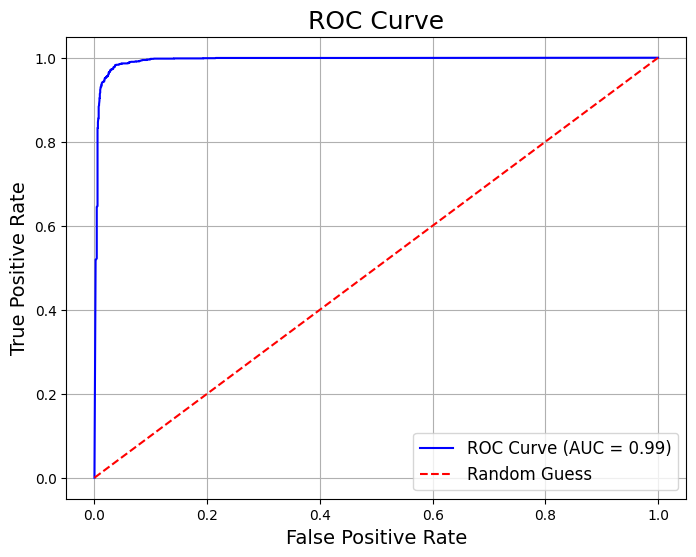

In [298]:
#Model Evaluation
# Accuracy score
print('Accuracy score')
print(accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('\n')

# Plot the Confusion Matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('\n')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid()
plt.show()

## 5. Support Vector Machine Classifier

In [299]:
# Initialize  Support Vector Machine model
model = SVC(probability=True, random_state=42)
model.fit(X_train_smote, y_train_smote)

SVC(probability=True, random_state=42)

In [300]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

Accuracy score
0.9644256858607175
Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96      1469
           1       0.97      0.97      0.97      1848

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317

Confusion Matrix:
[[1412   57]
 [  61 1787]]




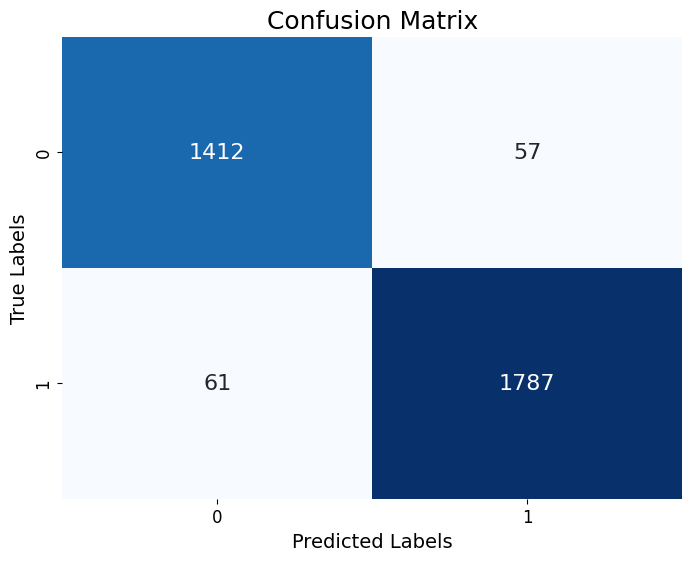

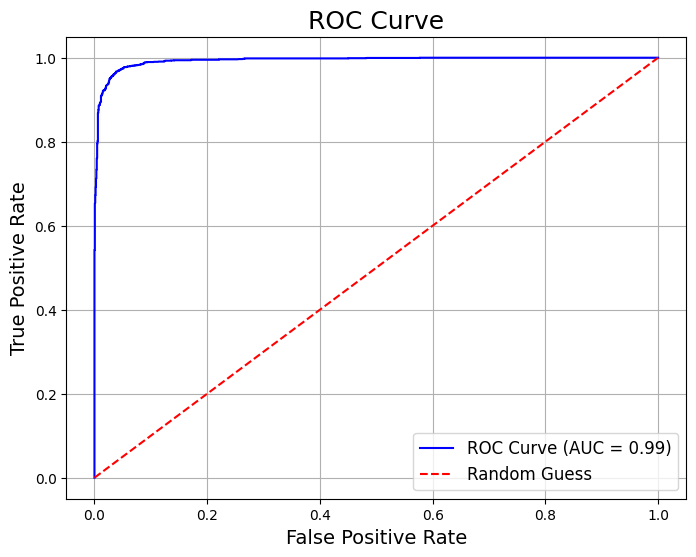

In [301]:
#Model Evaluation
# Accuracy score
print('Accuracy score')
print(accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('\n')

# Plot the Confusion Matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('\n')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid()
plt.show()

## 6.Decision Tree Classifier

In [302]:
max_depth_value = 5  # Set max depth

In [303]:
# Initialize  Decision Tree model with limited depth
model = DecisionTreeClassifier(random_state=42, max_depth=max_depth_value)
model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [304]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

Accuracy score
0.9315646668676515
Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.93      0.92      1469
           1       0.94      0.94      0.94      1848

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317

Confusion Matrix:
[[1359  110]
 [ 117 1731]]




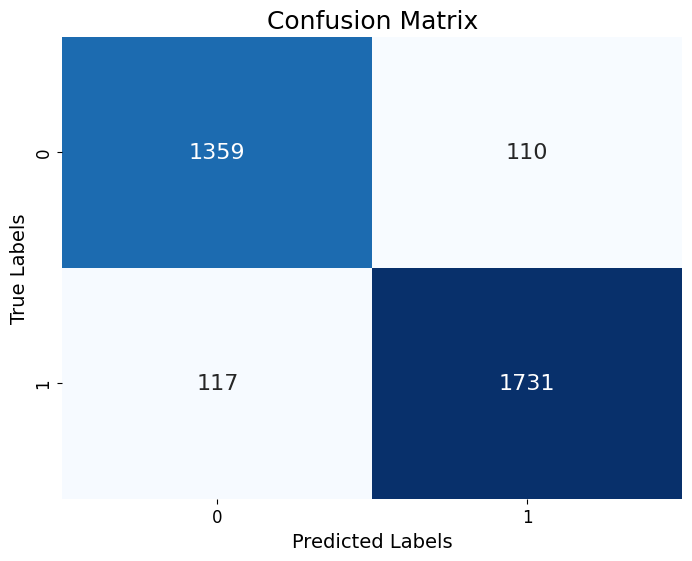

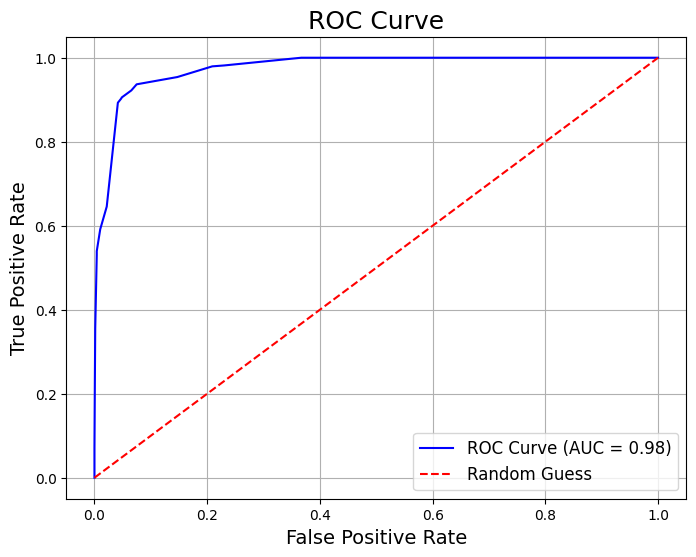

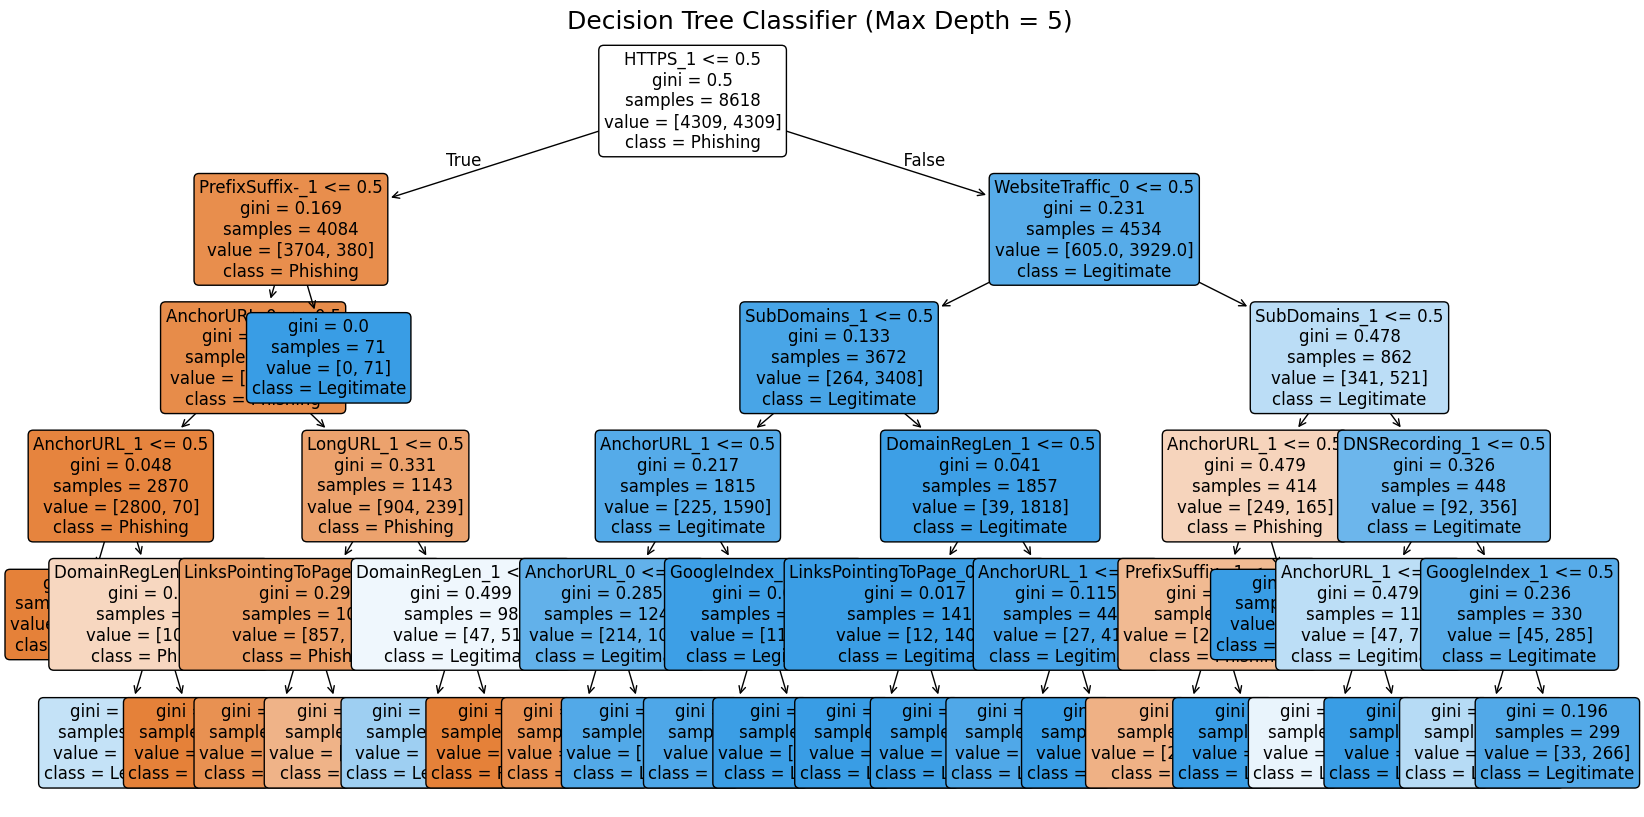

In [305]:
#Model Prediction
# Accuracy score
print('Accuracy score')
print(accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('\n')

# Plot the Confusion Matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('\n')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid()
plt.show()
print('\n')

# Plot the Decision Tree with limited depth
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Phishing', 'Legitimate'], rounded=True, fontsize=12)
plt.title("Decision Tree Classifier (Max Depth = 5)", fontsize=18)
plt.show()

##7. K Nearest Neighbour

In [306]:
# List of k values to evaluate
k_values = [3, 5, 7]


Classification Report for k = 3:

              precision    recall  f1-score   support

          -1       0.96      0.95      0.95      1469
           1       0.96      0.97      0.96      1848

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317

Confusion Matrix:
[[1393   76]
 [  58 1790]]


<Figure size 800x600 with 0 Axes>

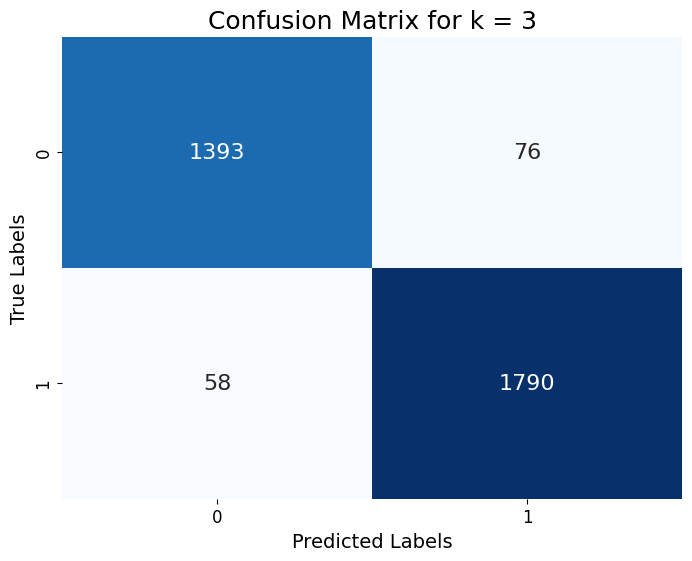

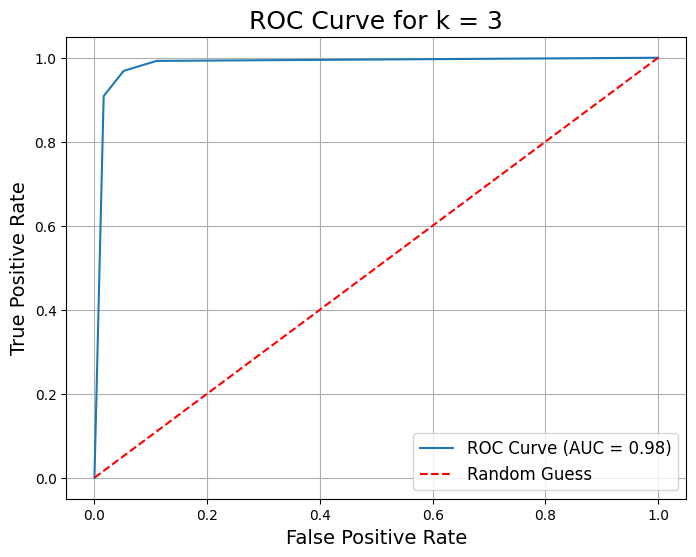


Classification Report for k = 5:

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95      1469
           1       0.96      0.96      0.96      1848

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317

Confusion Matrix:
[[1402   67]
 [  72 1776]]


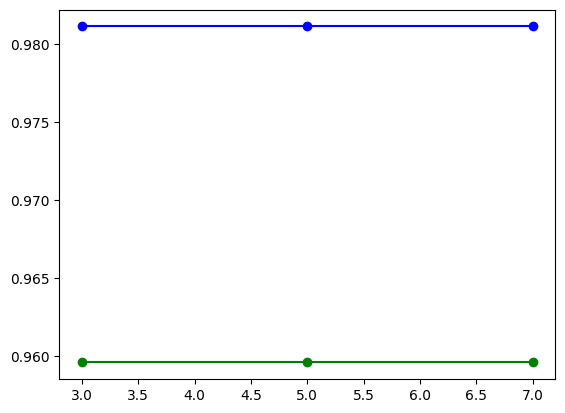

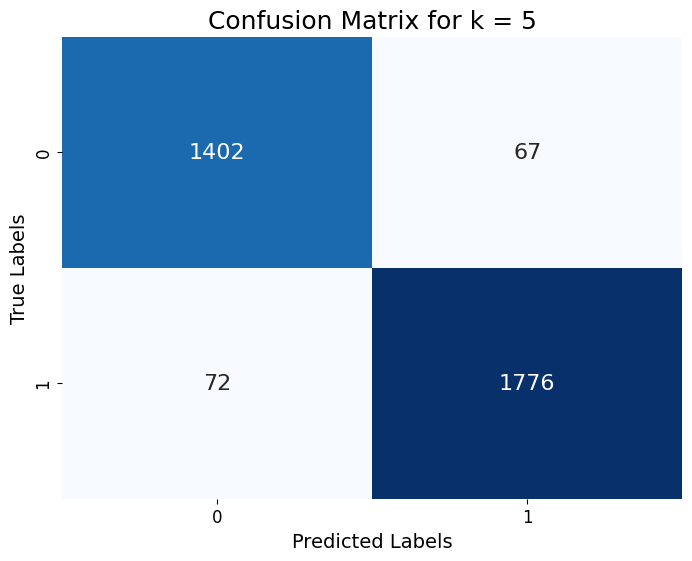

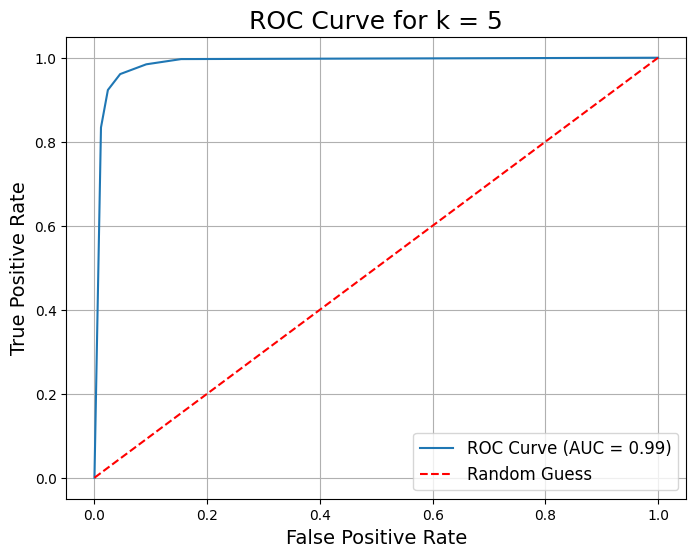


Classification Report for k = 7:

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95      1469
           1       0.96      0.96      0.96      1848

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317

Confusion Matrix:
[[1399   70]
 [  69 1779]]


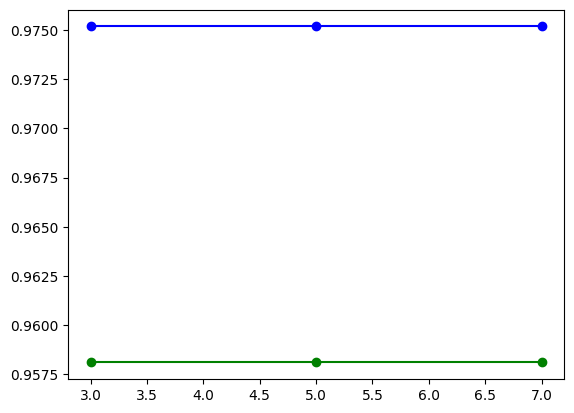

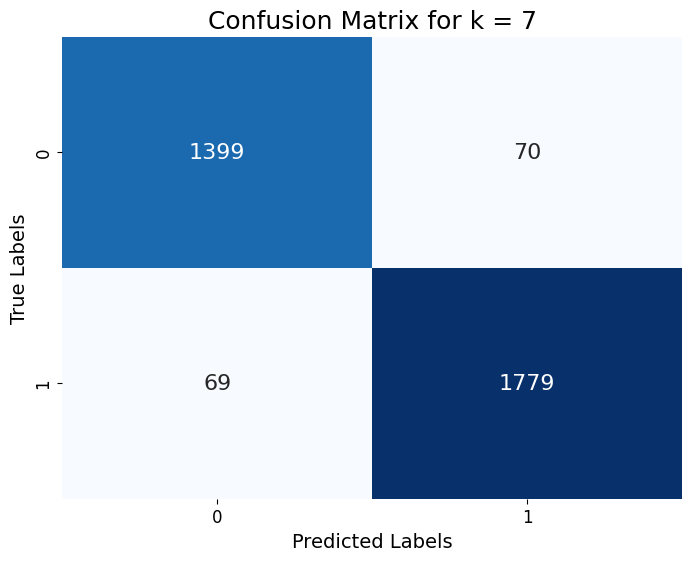

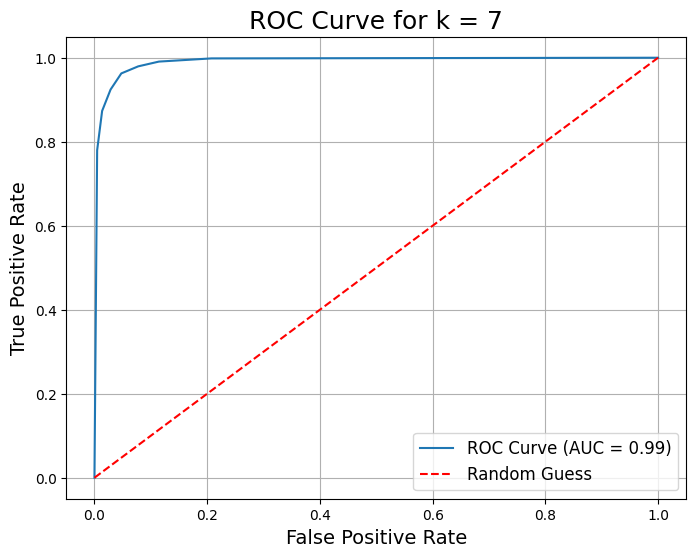

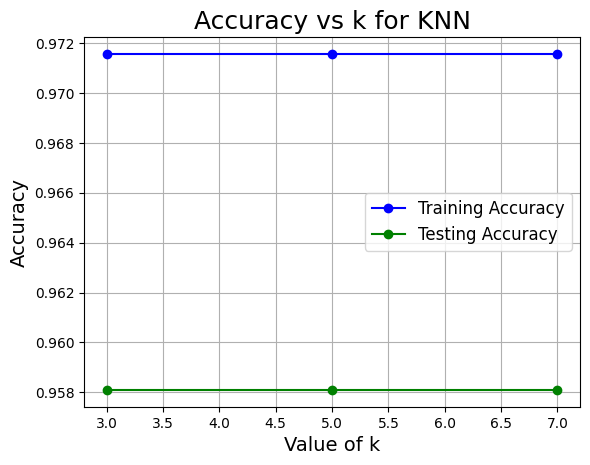

In [307]:
plt.figure(figsize=(8, 6))

# Train and evaluate KNN for each k
for k in k_values:
    print(f"\nClassification Report for k = {k}:\n")

    # Initialize  KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote, y_train_smote)

    # Predictions
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)[:, 1]

    # Classification Report
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot the Confusion Matrix with Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title(f'Confusion Matrix for k = {k}', fontsize=18)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
    plt.title(f'ROC Curve for k = {k}', fontsize=18)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid()
    plt.show()

    # Plot accuracy vs. k
    plt.plot(k_values, [knn.score(X_train, y_train) for k in k_values], label='Training Accuracy', color='blue', marker='o')
    plt.plot(k_values, [knn.score(X_test, y_test) for k in k_values], label='Testing Accuracy', color='green', marker='o')

plt.title('Accuracy vs k for KNN', fontsize=18)
plt.xlabel('Value of k', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.show()

##8. Artificial Neural Network

In [308]:
def enhanced_ann_randomizer(input_string, input_dim=22, output_dim=1, num_classes=None):
    """
    Generates a random artificial neural network (ANN) architecture using a given input string as a seed.

    Parameters:
    - input_string (str): A string used as a seed to ensure reproducibility.
    - input_dim (int): The number of input features for the model (default is 22).
    - output_dim (int): The number of output nodes for binary classification (default is 1).
    - num_classes (int): The number of output nodes for multi-class classification (if applicable).

    Returns:
    - model (tensorflow.keras.Model): The compiled ANN model.
    - batch_size (int): The batch size for training the model.
    - epochs (int): The number of epochs for training the model.
    """
    # Generate a reproducible seed using a stable hash function
    seed = int(hashlib.sha256(input_string.encode('utf-8')).hexdigest(), 16) % (2**32)
    random.seed(seed)

    # Randomize architecture parameters
    num_hidden_layers = random.randint(1, 10)  # Random number of hidden layers (1 to 10)
    layer_sizes = [random.randint(8, 256) for _ in range(num_hidden_layers)]  # Random number of units per layer
    activations = [random.choice(['relu', 'tanh', 'sigmoid']) for _ in range(num_hidden_layers)]  # Random activation functions
    dropout_rates = [random.uniform(0.1, 0.5) for _ in range(num_hidden_layers)]  # Random dropout rates (0.1 to 0.5)
    layer_types = [random.choice(['Dense', 'Dropout', 'BatchNorm']) for _ in range(num_hidden_layers)]  # Random layer types

    # Hyperparameters for training
    learning_rate = random.uniform(0.001, 0.01)  # Random learning rate (0.001 to 0.01)
    batch_size = random.choice([16, 32, 64, 128])  # Random choice of batch sizes
    epochs = random.randint(10, 50)  # Random number of training epochs (10 to 50)

    # Build the model
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # Input layer for the model

    for i in range(num_hidden_layers):
        if layer_types[i] == 'Dense':
            model.add(Dense(layer_sizes[i], activation=activations[i]))
        elif layer_types[i] == 'Dropout':
            model.add(Dropout(dropout_rates[i]))
        elif layer_types[i] == 'BatchNorm':
            model.add(BatchNormalization())

    # Output layer for the model based on classification type
    if num_classes:  # Multi-class classification
        model.add(Dense(num_classes, activation='softmax'))
        loss_function = 'categorical_crossentropy'
    else:  # Binary classification
        model.add(Dense(output_dim, activation='sigmoid'))
        loss_function = 'binary_crossentropy'

    # Compile the model with a randomly selected optimizer
    optimizer = random.choice([Adam(learning_rate), SGD(learning_rate), RMSprop(learning_rate), Adagrad(learning_rate)])
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy','AUC'])

    # Print the structure of the model
    print("\nModel Structure:")
    model.summary()

    # Draw and visualize the model architecture
    plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_structure.png')
    print("\nModel visualization saved as 'model_structure.png'.")
    # Display the model structure image in the notebook
    display(Image(filename='model_structure.png'))

    # Return the model and training parameters
    return model, batch_size, epochs

def get_callbacks():
    """
    Returns a list of callbacks for training with early stopping and learning rate scheduler.
    """
    # Early stopping callback to stop training when the validation loss does not improve for a certain number of epochs
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=5, restore_best_weights=True
    )

    # Learning rate scheduler callback to reduce the learning rate when the validation loss plateaus
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6
    )

    return [early_stopping, lr_scheduler]

callbacks = get_callbacks()

# # Model training (example)
# history = model.fit(
#     X_train, y_train,
#     validation_split=0.2,
#     epochs=epochs,
#     batch_size=batch_size,
#     callbacks=callbacks,
#     verbose=1
# )



Model Structure:


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 198)                 │           7,722 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 181)                 │          36,019 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 181)                 │             724 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 240)                 │          43,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 240)                 │             960 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 67)                  │          16,147 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 67)                  │             268 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 111)                 │           7,548 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 111)                 │             444 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 111)                 │             444 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │             112 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,068 (445.58 KB)

 Trainable params: 112,648 (440.03 KB)

 Non-trainable params: 1,420 (5.55 KB)


Model visualization saved as 'model_structure.png'.


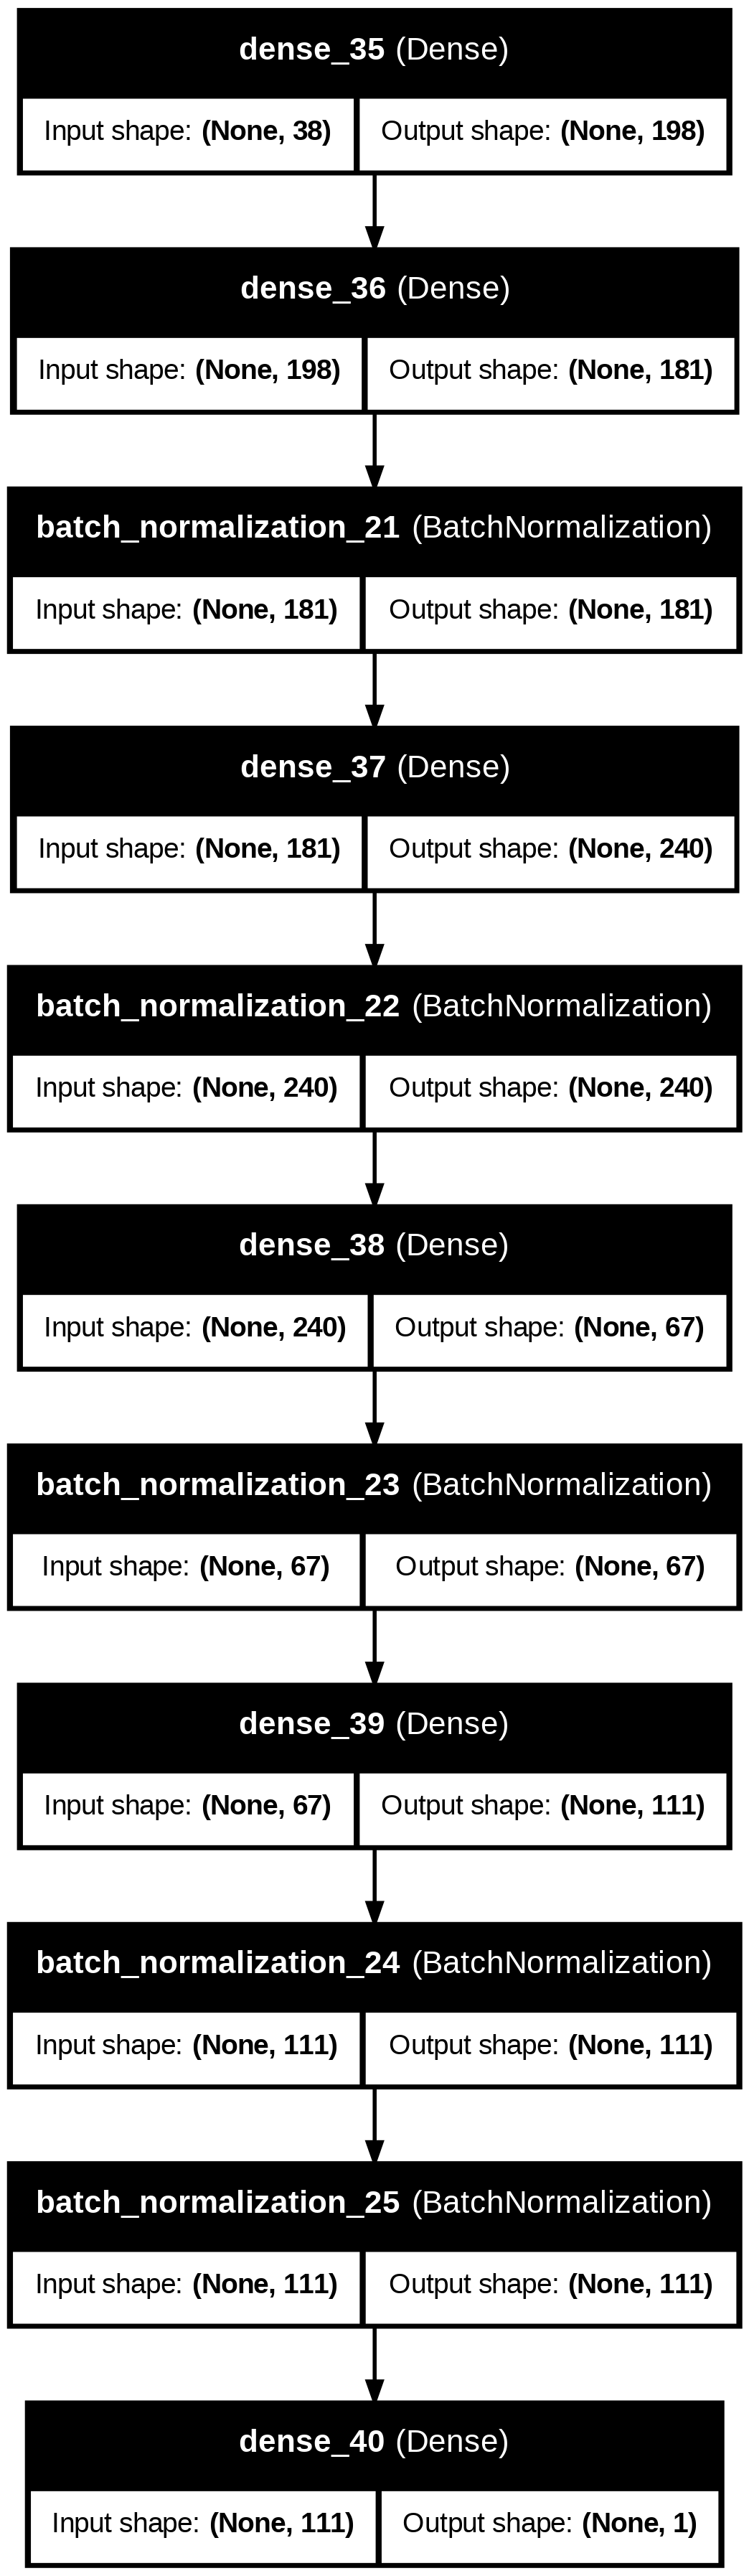

Epoch 1/14
431/431 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - AUC: 0.0000e+00 - accuracy: 0.4866 - loss: -15.3171 - val_AUC: 0.0000e+00 - val_accuracy: 0.2668 - val_loss: -125.0682 - learning_rate: 0.0013
Epoch 2/14
431/431 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - AUC: 0.0000e+00 - accuracy: 0.4828 - loss: -122.4834 - val_AUC: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: -629.6635 - learning_rate: 0.0013
Epoch 3/14
431/431 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - AUC: 0.0000e+00 - accuracy: 0.4729 - loss: -351.1549 - val_AUC: 0.0000e+00 - val_accuracy: 0.2720 - val_loss: -467.1105 - learning_rate: 0.0013
Epoch 4/14
431/431 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - AUC: 0.0000e+00 - accuracy: 0.4423 - loss: -673.9238 - val_AUC: 0.0000e+00 - val_accuracy: 0.2668 - val_loss: -1419.2876 - learning_rate: 0.0013
Epoch 5/14
431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.0000e+00 - accuracy: 0.4353 - loss: -1080.9548 - val_AUC: 0.0000e+00 - val_accuracy: 0.2483 - val_loss: -2865.4543 - learning_rate: 0.0013
Epoch 

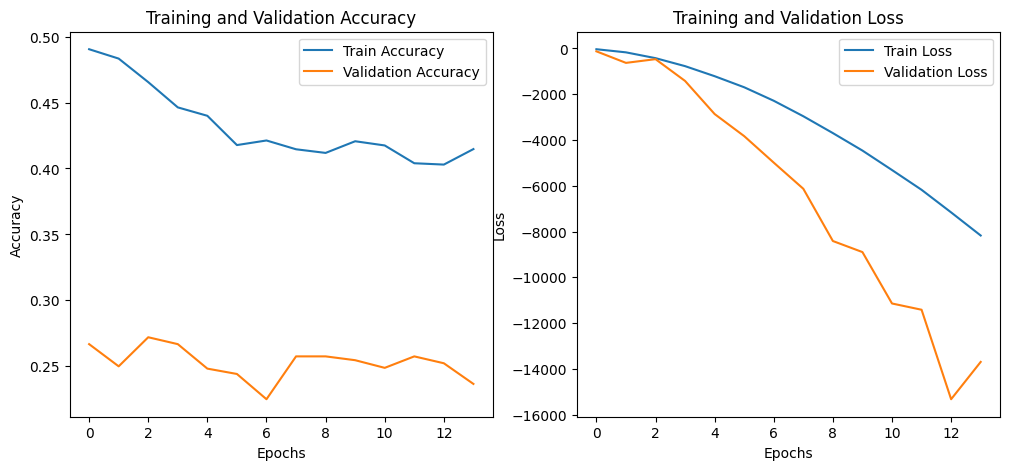

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.9481459149834187
Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.97      0.94      1469
           1       0.97      0.93      0.95      1848

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317

Confusion Matrix:
 [[1418   51]
 [ 121 1727]]


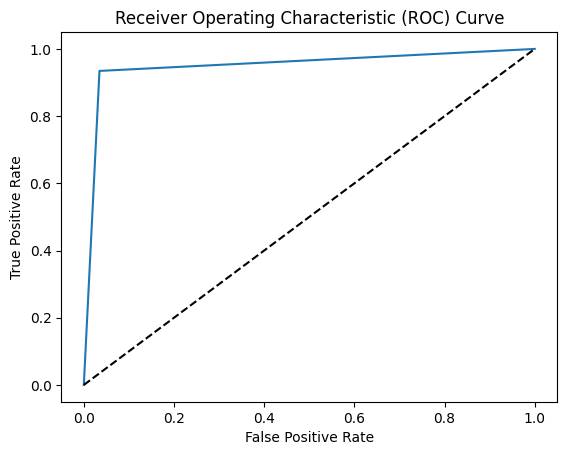

In [309]:
# Convert y_train_smote to a numeric type
y_train_smote = y_train_smote.astype('int')

# Convert the features to float32 if not already done
X_train_smote = X_train_smote.astype('float32')

# Check for NaNs or infinite values and handle them
# X_train_smote = X_train_smote.fillna(0)
# X_train_smote = X_train_smote.replace([np.inf, -np.inf], 0)

# n=X_train_smote.shape[1]
# # Initialize the ANN model
# model = Sequential()
# model.add(Input(shape=(n,)))
# model.add(Dense(units=2*n, activation='relu'))
# model.add(Dense(units=n, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(units=1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

# Train the model
# history = model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=16, validation_split=0.2)

#Ann randomizer
input_string = "LIGMABALLS"
model, batch_size, epochs = enhanced_ann_randomizer(input_string,X_train_smote.shape[1],1)

history = model.fit(
    X_train_smote, y_train_smote,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks,
    verbose=1
)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

y_pred_probs = model.predict(X_test)  # Predicted probabilities
y_pred = np.where(y_pred_probs > 0.5, 1, -1)  # Convert to -1 or 1

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()